# **Algerian Dataset with a twist**
 It is supposed to be a `classification`  problem, but whatif you had to predict the Temperature. and all you were provided with was the **Algerian Dataset** ?

## Linear Regression on Algerian Dataset for predicting `Temperature`

### Steps we are going to follow:
- Load dataset
- Basic pre-processing
  - Datatype conformation
  - Missing value filling
  - Data correction
- EDA
  - Univariate and Bi-variate feature assessment
    - Correlation Handling
  - Linear regression assumption conformation
- Machine Learning Model
  - Linear model
  - Ridge and Lasso test
  - performance test
- repeat to Feature Engineering If required

#### 1: WE LOAD RELEVANT LIBRARIES


In [ ]:
import numpy as np
import pandas as pd

from scipy.stats import boxcox,yeojohnson
from scipy.stats import iqr

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
import warnings


warnings.filterwarnings("ignore", category=UserWarning, module="specific_module")


# LOADING THE DATASET

In [3]:
raw=pd.read_csv('./algerianForest.csv')
raw.head()

Bejaia Region Dataset 
day month year Temperature  RH  Ws Rain  FFMC DMC DC  ISI BUI FWI              Classes  
01  06    2012 29          57  18  0     65.7 3.4 7.6 1.3 3.4 0.5            not fire   
02  06    2012 29          61  13  1.3   64.4 4.1 7.6 1   3.9 0.4            not fire   
03  06    2012 26          82  22  13.1  47.1 2.5 7.1 0.3 2.7 0.1            not fire   
04  06    2012 25          89  13  2.5   28.6 1.3 6.9 0   1.7 0              not fire

As you can see the dataset is having misplaced columns.

The actual values for the column name are in the row index 0

In [4]:
# Handling misplaced rows

# resetting the index first


raw.reset_index(inplace=True)
raw


level_0 level_1 level_2      level_3 level_4 level_5 level_6 level_7  \
0       day   month    year  Temperature      RH      Ws   Rain     FFMC   
1        01      06    2012           29      57      18       0    65.7   
2        02      06    2012           29      61      13     1.3    64.4   
3        03      06    2012           26      82      22    13.1    47.1   
4        04      06    2012           25      89      13     2.5    28.6   
..      ...     ...     ...          ...     ...     ...     ...     ...   
242      26      09    2012           30      65      14       0    85.4   
243      27      09    2012           28      87      15     4.4    41.1   
244      28      09    2012           27      87      29     0.5    45.9   
245      29      09    2012           24      54      18     0.1    79.7   
246      30      09    2012           24      64      15     0.2    67.3   

    level_8 level_9 level_10 level_11 level_12 Bejaia Region Dataset   
0       DMC      DC      ISI      BUI      FWI              Classes    
1       3.4     7.6      1.3      3.4      0.5            not fire     
2       4.1     7.6        1      3.9      0.4            not fire     
3       2.5     7.1      0.3      2.7      0.1            not fire     
4       1.3     6.9        0      1.7        0            not fire     
..      ...     ...      ...      ...      ...                    ...  
242      16    44.5      4.5     16.9      6.5                fire     
243     6.5       8      0.1      6.2        0            not fire     
244     3.5     7.9      0.4      3.4      0.2            not fire     
245     4.3    15.2      1.7      5.1      0.7            not fire     
246     3.8    16.5      1.2      4.8      0.5           not fire      

[247 rows x 14 columns]

In [5]:
# adding the 1st row value of `raw` dataframe as columns name
raw.columns = raw.iloc[0]
raw=raw.drop(0)
raw

0   day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
1    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
2    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
3    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
4    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
5    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

0    FWI     Classes    
1    0.5   not fire     
2    0.4   not fire     
3    0.1   not fire     
4      0   not fire     
5    0.5   not fire     
..   ...           ...  
242  6.5       fire     
243    0   not fire     
244  0.2   not fire     
245  0.7   not fire     
246  0.5  not fire      

[246 rows x 14 columns]

# It looks better now

In [6]:
raw.columns


Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object', name=0)

# We see there are unnecessary balnk spaces sorrounding the names of the columns. Lets remove them

In [7]:
raw.columns=[col.strip() for col in raw.columns]
raw.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

### Now lets handle missing datas

In [8]:
raw.isna().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [9]:
for col in raw.columns:
    display(raw[raw[col].isna()])

Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes]
Index: []

day month year Temperature   RH   Ws Rain FFMC  \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
123  NaN  NaN  NaN  NaN  NaN     NaN

day month year Temperature   RH   Ws Rain FFMC  \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
123  NaN  NaN  NaN  NaN  NaN     NaN

day month year Temperature   RH   Ws Rain FFMC  \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
123  NaN  NaN  NaN  NaN  NaN     NaN

day month year Temperature   RH   Ws Rain FFMC  \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
123  NaN  NaN  NaN  NaN  NaN     NaN

day month year Temperature   RH   Ws Rain FFMC  \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
123  NaN  NaN  NaN  NaN  NaN     NaN

day month year Temperature   RH   Ws Rain FFMC  \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
123  NaN  NaN  NaN  NaN  NaN     NaN

day month year Temperature   RH   Ws Rain FFMC  \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
123  NaN  NaN  NaN  NaN  NaN     NaN

day month year Temperature   RH   Ws Rain FFMC  \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
123  NaN  NaN  NaN  NaN  NaN     NaN

day month year Temperature   RH   Ws Rain FFMC  \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
123  NaN  NaN  NaN  NaN  NaN     NaN

day month year Temperature   RH   Ws Rain FFMC  \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
123  NaN  NaN  NaN  NaN  NaN     NaN

day month year Temperature   RH   Ws Rain FFMC  \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
123  NaN  NaN  NaN  NaN  NaN     NaN

day month year Temperature   RH   Ws Rain FFMC  \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
123  NaN  NaN  NaN  NaN  NaN     NaN

day month  year Temperature   RH   Ws Rain  \
123  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN  NaN   
168                             14    07  2012          37   37   18  0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes  
123   NaN   NaN     NaN   NaN   NaN      NaN     NaN  
168  88.9  12.9  14.6 9  12.5  10.4  fire        NaN

Lets drop the row indexed 123 since all its values are NaN.

In [10]:
raw.loc[122:]

day  month  year  Temperature   RH   Ws   Rain  \
122                             30     09  2012           25   78   14    1.4   
123  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
124                            day  month  year  Temperature   RH   Ws  Rain    
125                             01     06  2012           32   71   12    0.7   
126                             02     06  2012           30   73   13      4   
..                             ...    ...   ...          ...  ...  ...    ...   
242                             26     09  2012           30   65   14      0   
243                             27     09  2012           28   87   15    4.4   
244                             28     09  2012           27   87   29    0.5   
245                             29     09  2012           24   54   18    0.1   
246                             30     09  2012           24   64   15    0.2   

     FFMC  DMC    DC  ISI   BUI  FWI       Classes  
122    45  1.9   7.5  0.2   2.4  0.1   not fire     
123   NaN  NaN   NaN  NaN   NaN  NaN           NaN  
124  FFMC  DMC    DC  ISI   BUI  FWI     Classes    
125  57.1  2.5   8.2  0.6   2.8  0.2   not fire     
126  55.7  2.7   7.8  0.6   2.9  0.2   not fire     
..    ...  ...   ...  ...   ...  ...           ...  
242  85.4   16  44.5  4.5  16.9  6.5       fire     
243  41.1  6.5     8  0.1   6.2    0   not fire     
244  45.9  3.5   7.9  0.4   3.4  0.2   not fire     
245  79.7  4.3  15.2  1.7   5.1  0.7   not fire     
246  67.3  3.8  16.5  1.2   4.8  0.5  not fire      

[125 rows x 14 columns]

# While handling nan valuewe get to know there are 2 separate geographical locations in the dataset of which the datasets are specifically given separately.
SO lets do some research on the geographical locations of the dataset, to determine if the need be seperately trained for model.

### Results:
Sure, I can help you with that. Here is an expert analysis of the geography of Bejaia Region and Sidi-Bel Abbes Region in Algeria, to help you determine whether you should train separate models for both of them or a single model:

* **Bejaia Region** is located in northeastern Algeria, bordering the Mediterranean Sea. It is a mountainous region with a Mediterranean climate. The average temperature in Bejaia Region is 18°C (64°F), with warm summers and cool winters.
* **Sidi-Bel Abbes Region** is located in western Algeria, bordering Morocco. It is a desert region with a hot desert climate. The average temperature in Sidi-Bel Abbes Region is 27°C (81°F), with hot summers and mild winters.

Based on their different geographies, it is likely that Bejaia Region and Sidi-Bel Abbes Region have different temperature patterns. Therefore, it would be better to train separate models for each region. This would allow the models to learn the specific factors that affect temperature in each region, and would result in more accurate predictions.

Here are some of the factors that could affect the temperature in Bejaia Region and Sidi-Bel Abbes Region:

* **Altitude:** Bejaia Region is a mountainous region, while Sidi-Bel Abbes Region is a desert region. Altitude can have a significant impact on temperature, with higher altitudes being cooler.
* **Nearness to the sea:** Bejaia Region borders the Mediterranean Sea, while Sidi-Bel Abbes Region does not. The sea can moderate temperatures, making coastal regions cooler in the summer and warmer in the winter.
* **Precipitation:** Bejaia Region receives more precipitation than Sidi-Bel Abbes Region. Precipitation can affect temperature by evaporating and releasing latent heat into the atmosphere.
* **Vegetation:** Bejaia Region has more vegetation than Sidi-Bel Abbes Region. Vegetation can help to cool the air by shading it and by evaporating water.

By taking these factors into account, you can train separate models for Bejaia Region and Sidi-Bel Abbes Region that will be more accurate at predicting temperature in each region.

**So there is an option for weighted modelling. But lets do a more simple first**
**Conclusion**
- Due to the fact that they have different climates, so it is better to do the modelling separately. But we will also make a combined model.


raw.

In [11]:
Bejaia_df =raw.loc[:122]

In [12]:
Bejaia_df =raw.loc[:122]
Bejaia_df

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
1    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
2    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
3    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
4    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
5    05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...  ...  ...   
118  26    09  2012          31  54  11     0    82    6  16.3  2.5  6.2  1.7   
119  27    09  2012          31  66  11     0  85.7  8.3  24.9    4    9  4.1   
120  28    09  2012          32  47  14   0.7  77.5  7.1   8.8  1.8  6.8  0.9   
121  29    09  2012          26  80  16   1.8  47.4  2.9   7.7  0.3    3  0.1   
122  30    09  2012          25  78  14   1.4    45  1.9   7.5  0.2  2.4  0.1   

         Classes  
1    not fire     
2    not fire     
3    not fire     
4    not fire     
5    not fire     
..           ...  
118  not fire     
119      fire     
120  not fire     
121  not fire     
122  not fire     

[122 rows x 14 columns]

In [13]:
SidiBel_df=raw.loc[125:]
SidiBel_df

day month  year Temperature  RH  Ws Rain  FFMC  DMC    DC  ISI   BUI  FWI  \
125  01    06  2012          32  71  12  0.7  57.1  2.5   8.2  0.6   2.8  0.2   
126  02    06  2012          30  73  13    4  55.7  2.7   7.8  0.6   2.9  0.2   
127  03    06  2012          29  80  14    2  48.7  2.2   7.6  0.3   2.6  0.1   
128  04    06  2012          30  64  14    0  79.4  5.2  15.4  2.2   5.6    1   
129  05    06  2012          32  60  14  0.2  77.1    6  17.6  1.8   6.5  0.9   
..   ..   ...   ...         ...  ..  ..  ...   ...  ...   ...  ...   ...  ...   
242  26    09  2012          30  65  14    0  85.4   16  44.5  4.5  16.9  6.5   
243  27    09  2012          28  87  15  4.4  41.1  6.5     8  0.1   6.2    0   
244  28    09  2012          27  87  29  0.5  45.9  3.5   7.9  0.4   3.4  0.2   
245  29    09  2012          24  54  18  0.1  79.7  4.3  15.2  1.7   5.1  0.7   
246  30    09  2012          24  64  15  0.2  67.3  3.8  16.5  1.2   4.8  0.5   

          Classes  
125   not fire     
126   not fire     
127   not fire     
128   not fire     
129   not fire     
..            ...  
242       fire     
243   not fire     
244   not fire     
245   not fire     
246  not fire      

[122 rows x 14 columns]

In [14]:
algerian_df=pd.concat([Bejaia_df,SidiBel_df])
algerian_df

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
1    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
2    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
3    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
4    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
5    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI       Classes  
1    0.5   not fire     
2    0.4   not fire     
3    0.1   not fire     
4      0   not fire     
5    0.5   not fire     
..   ...           ...  
242  6.5       fire     
243    0   not fire     
244  0.2   not fire     
245  0.7   not fire     
246  0.5  not fire      

[244 rows x 14 columns]

So now that it is seprated and combined again. What we will be doing is doing basic Feature Engineering on all three and than check which one worksd best for us.

In [15]:
algerian_df.isna().sum(),


(day            0
 month          0
 year           0
 Temperature    0
 RH             0
 Ws             0
 Rain           0
 FFMC           0
 DMC            0
 DC             0
 ISI            0
 BUI            0
 FWI            0
 Classes        1
 dtype: int64,)

It seems Classes of Bejaia and algerian are having missing values.
Lets ceck them out handle them.
*Note, You should always handle the rows having the missing value.

In [16]:
algerian_df[algerian_df['Classes'].isna()]

day month  year Temperature  RH  Ws Rain  FFMC   DMC      DC   ISI   BUI  \
168  14    07  2012          37  37  18  0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes  
168  fire        NaN

As  you can see the value of classes column is miss placed lets fix that.

In [17]:
# Filling NaN first.

algerian_df['Classes'].fillna('fire',inplace=True)
# Bejaia_df['Classes'].fillna('fire',inplace=True)  



# Handling Classes Categorical values


In [18]:
algerian_df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

We need to strip them first before `OneHotEncoder` can be applied.
Or we could do it in one step using apply:
```python


In [19]:
algerian_df['Classes']=algerian_df['Classes'].apply(lambda x: int(x.strip()=='fire'))
algerian_df

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
1    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
2    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
3    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
4    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
5    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI  Classes  
1    0.5        0  
2    0.4        0  
3    0.1        0  
4      0        0  
5    0.5        0  
..   ...      ...  
242  6.5        1  
243    0        0  
244  0.2        0  
245  0.7        0  
246  0.5        0  

[244 rows x 14 columns]

In [20]:
SidiBel_df

day month  year Temperature  RH  Ws Rain  FFMC  DMC    DC  ISI   BUI  FWI  \
125  01    06  2012          32  71  12  0.7  57.1  2.5   8.2  0.6   2.8  0.2   
126  02    06  2012          30  73  13    4  55.7  2.7   7.8  0.6   2.9  0.2   
127  03    06  2012          29  80  14    2  48.7  2.2   7.6  0.3   2.6  0.1   
128  04    06  2012          30  64  14    0  79.4  5.2  15.4  2.2   5.6    1   
129  05    06  2012          32  60  14  0.2  77.1    6  17.6  1.8   6.5  0.9   
..   ..   ...   ...         ...  ..  ..  ...   ...  ...   ...  ...   ...  ...   
242  26    09  2012          30  65  14    0  85.4   16  44.5  4.5  16.9  6.5   
243  27    09  2012          28  87  15  4.4  41.1  6.5     8  0.1   6.2    0   
244  28    09  2012          27  87  29  0.5  45.9  3.5   7.9  0.4   3.4  0.2   
245  29    09  2012          24  54  18  0.1  79.7  4.3  15.2  1.7   5.1  0.7   
246  30    09  2012          24  64  15  0.2  67.3  3.8  16.5  1.2   4.8  0.5   

          Classes  
125   not fire     
126   not fire     
127   not fire     
128   not fire     
129   not fire     
..            ...  
242       fire     
243   not fire     
244   not fire     
245   not fire     
246  not fire      

[122 rows x 14 columns]

The previous run was done to check if the referencing is working. 

**It didnt.**

My hypothesis is the referencing didnt work becuase while using `apply` we replaced the reference itself. 

Lets intentionally use referencing for our convinience.

In [21]:
algerian_df=pd.concat([Bejaia_df,SidiBel_df]).copy(deep=True)
algerian_df

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
1    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
2    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
3    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
4    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
5    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI       Classes  
1    0.5   not fire     
2    0.4   not fire     
3    0.1   not fire     
4      0   not fire     
5    0.5   not fire     
..   ...           ...  
242  6.5       fire     
243    0   not fire     
244  0.2   not fire     
245  0.7   not fire     
246  0.5  not fire      

[244 rows x 14 columns]

In [22]:
Bejaia_df=algerian_df.loc[Bejaia_df.index].copy()
Bejaia_df

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
1    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
2    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
3    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
4    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
5    05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...  ...  ...   
118  26    09  2012          31  54  11     0    82    6  16.3  2.5  6.2  1.7   
119  27    09  2012          31  66  11     0  85.7  8.3  24.9    4    9  4.1   
120  28    09  2012          32  47  14   0.7  77.5  7.1   8.8  1.8  6.8  0.9   
121  29    09  2012          26  80  16   1.8  47.4  2.9   7.7  0.3    3  0.1   
122  30    09  2012          25  78  14   1.4    45  1.9   7.5  0.2  2.4  0.1   

         Classes  
1    not fire     
2    not fire     
3    not fire     
4    not fire     
5    not fire     
..           ...  
118  not fire     
119      fire     
120  not fire     
121  not fire     
122  not fire     

[122 rows x 14 columns]

In [23]:
SidiBel_df=algerian_df.loc[SidiBel_df.index].copy()
SidiBel_df

day month  year Temperature  RH  Ws Rain  FFMC  DMC    DC  ISI   BUI  FWI  \
125  01    06  2012          32  71  12  0.7  57.1  2.5   8.2  0.6   2.8  0.2   
126  02    06  2012          30  73  13    4  55.7  2.7   7.8  0.6   2.9  0.2   
127  03    06  2012          29  80  14    2  48.7  2.2   7.6  0.3   2.6  0.1   
128  04    06  2012          30  64  14    0  79.4  5.2  15.4  2.2   5.6    1   
129  05    06  2012          32  60  14  0.2  77.1    6  17.6  1.8   6.5  0.9   
..   ..   ...   ...         ...  ..  ..  ...   ...  ...   ...  ...   ...  ...   
242  26    09  2012          30  65  14    0  85.4   16  44.5  4.5  16.9  6.5   
243  27    09  2012          28  87  15  4.4  41.1  6.5     8  0.1   6.2    0   
244  28    09  2012          27  87  29  0.5  45.9  3.5   7.9  0.4   3.4  0.2   
245  29    09  2012          24  54  18  0.1  79.7  4.3  15.2  1.7   5.1  0.7   
246  30    09  2012          24  64  15  0.2  67.3  3.8  16.5  1.2   4.8  0.5   

          Classes  
125   not fire     
126   not fire     
127   not fire     
128   not fire     
129   not fire     
..            ...  
242       fire     
243   not fire     
244   not fire     
245   not fire     
246  not fire      

[122 rows x 14 columns]

In [24]:
algerian_df=algerian_df.rename({'Classes':'isFire'},axis=1)

In [25]:
algerian_df

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
1    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
2    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
3    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
4    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
5    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI        isFire  
1    0.5   not fire     
2    0.4   not fire     
3    0.1   not fire     
4      0   not fire     
5    0.5   not fire     
..   ...           ...  
242  6.5       fire     
243    0   not fire     
244  0.2   not fire     
245  0.7   not fire     
246  0.5  not fire      

[244 rows x 14 columns]

In [26]:
algerian_df['day']=algerian_df['day'].astype(int)

In [27]:
algerian_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int32 
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  isFire       243 non-null    object
dtypes: int32(1), object(13)
memory usage: 35.7+ KB


In [28]:
algerian_df['month']=algerian_df['month'].astype(int)
algerian_df.dtypes

day             int32
month           int32
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
isFire         object
dtype: object

In [29]:
algerian_df['year']=algerian_df['year'].astype(int)

In [30]:
algerian_df['Temperature']=algerian_df['Temperature'].astype(float)
algerian_df.dtypes

day              int32
month            int32
year             int32
Temperature    float64
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
isFire          object
dtype: object

In [31]:
algerian_df['RH']=algerian_df['RH'].astype(float)
algerian_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  isFire       243 non-null    object 
dtypes: float64(2), int32(3), object(9)
memory usage: 33.8+ KB


In [32]:
algerian_df['Ws']=algerian_df['Ws'].astype(float)
algerian_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  isFire       243 non-null    object 
dtypes: float64(3), int32(3), object(8)
memory usage: 33.8+ KB


In [33]:
algerian_df['Rain']=algerian_df['Rain'].astype(float)
algerian_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  isFire       243 non-null    object 
dtypes: float64(4), int32(3), object(7)
memory usage: 33.8+ KB


In [34]:
algerian_df['FFMC']=algerian_df['FFMC'].astype(float)
algerian_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  isFire       243 non-null    object 
dtypes: float64(5), int32(3), object(6)
memory usage: 33.8+ KB


In [35]:

algerian_df['DMC']=algerian_df['DMC'].astype(float)
algerian_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  isFire       243 non-null    object 
dtypes: float64(6), int32(3), object(5)
memory usage: 33.8+ KB


In [36]:
try:
    algerian_df['DC']=algerian_df['DC'].astype(float)
    algerian_df.info()
except Exception as e:
    display(e)

ValueError("could not convert string to float: '14.6 9'")

In [37]:
# using apply to remove any spaces exist in the data
algerian_df['DC']=algerian_df['DC'].apply(lambda x: float(x.replace(" ","")))
algerian_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  isFire       243 non-null    object 
dtypes: float64(7), int32(3), object(4)
memory usage: 33.8+ KB


In [38]:
algerian_df['ISI']=algerian_df['ISI'].astype(float)
algerian_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  isFire       243 non-null    object 
dtypes: float64(8), int32(3), object(3)
memory usage: 33.8+ KB


In [39]:
try:
    algerian_df['FWI']=algerian_df['FWI'].astype(float)
    algerian_df.info()
except Exception as e:
    display(e)

ValueError("could not convert string to float: 'fire   '")

In [40]:
algerian_df['FWI']=algerian_df['FWI'].apply(lambda x: np.nan if 'fire' in x else float(x))
algerian_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    object 
 12  FWI          243 non-null    float64
 13  isFire       243 non-null    object 
dtypes: float64(9), int32(3), object(2)
memory usage: 33.8+ KB


In [41]:
algerian_df[algerian_df['FWI'].isna()]

day  month  year  Temperature    RH    Ws  Rain  FFMC   DMC     DC   ISI  \
168   14      7  2012         37.0  37.0  18.0   0.2  88.9  12.9  14.69  12.5   

      BUI  FWI isFire  
168  10.4  NaN    NaN

In [42]:
algerian_df['FWI'].fillna(algerian_df['FWI'].mean(),inplace=True)
algerian_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    float64
 13  isFire       243 non-null    object 
dtypes: float64(9), int32(3), object(2)
memory usage: 33.8+ KB


In [43]:
algerian_df['BUI']=algerian_df['BUI'].astype(float)
algerian_df.dtypes

day              int32
month            int32
year             int32
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
isFire          object
dtype: object

In [44]:
algerian_df['isFire']

1       not fire   
2       not fire   
3       not fire   
4       not fire   
5       not fire   
           ...     
242         fire   
243     not fire   
244     not fire   
245     not fire   
246    not fire    
Name: isFire, Length: 244, dtype: object

In [45]:

algerian_df['isFire'].fillna('fire',inplace=True)


In [46]:
# OneHotEncoding on isFire data
algerian_df['isFire']=algerian_df['isFire'].apply(lambda x: int(x.strip()=='fire'))
algerian_df.dtypes

day              int32
month            int32
year             int32
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
isFire           int64
dtype: object

Lets add bejaia or Sidibelabbes as one of the features and see if we can get any results

In [47]:
algerian_df['isBejaia']=pd.Series(
    np.concatenate(
        [
            np.ones(len(Bejaia_df)),
            np.zeros(len(SidiBel_df))
            
            ]),
    
    index=algerian_df.index)
algerian_df

day  month  year  Temperature    RH    Ws  Rain  FFMC   DMC    DC  ISI  \
1      1      6  2012         29.0  57.0  18.0   0.0  65.7   3.4   7.6  1.3   
2      2      6  2012         29.0  61.0  13.0   1.3  64.4   4.1   7.6  1.0   
3      3      6  2012         26.0  82.0  22.0  13.1  47.1   2.5   7.1  0.3   
4      4      6  2012         25.0  89.0  13.0   2.5  28.6   1.3   6.9  0.0   
5      5      6  2012         27.0  77.0  16.0   0.0  64.8   3.0  14.2  1.2   
..   ...    ...   ...          ...   ...   ...   ...   ...   ...   ...  ...   
242   26      9  2012         30.0  65.0  14.0   0.0  85.4  16.0  44.5  4.5   
243   27      9  2012         28.0  87.0  15.0   4.4  41.1   6.5   8.0  0.1   
244   28      9  2012         27.0  87.0  29.0   0.5  45.9   3.5   7.9  0.4   
245   29      9  2012         24.0  54.0  18.0   0.1  79.7   4.3  15.2  1.7   
246   30      9  2012         24.0  64.0  15.0   0.2  67.3   3.8  16.5  1.2   

      BUI  FWI  isFire  isBejaia  
1     3.4  0.5       0       1.0  
2     3.9  0.4       0       1.0  
3     2.7  0.1       0       1.0  
4     1.7  0.0       0       1.0  
5     3.9  0.5       0       1.0  
..    ...  ...     ...       ...  
242  16.9  6.5       1       0.0  
243   6.2  0.0       0       0.0  
244   3.4  0.2       0       0.0  
245   5.1  0.7       0       0.0  
246   4.8  0.5       0       0.0  

[244 rows x 15 columns]

In [48]:
algerian_df['isSidiBel']=pd.Series(
    np.concatenate(
        [
            np.zeros(len(Bejaia_df)),
            np.ones(len(SidiBel_df))
            
            ]),
    
    index=algerian_df.index)
algerian_df

day  month  year  Temperature    RH    Ws  Rain  FFMC   DMC    DC  ISI  \
1      1      6  2012         29.0  57.0  18.0   0.0  65.7   3.4   7.6  1.3   
2      2      6  2012         29.0  61.0  13.0   1.3  64.4   4.1   7.6  1.0   
3      3      6  2012         26.0  82.0  22.0  13.1  47.1   2.5   7.1  0.3   
4      4      6  2012         25.0  89.0  13.0   2.5  28.6   1.3   6.9  0.0   
5      5      6  2012         27.0  77.0  16.0   0.0  64.8   3.0  14.2  1.2   
..   ...    ...   ...          ...   ...   ...   ...   ...   ...   ...  ...   
242   26      9  2012         30.0  65.0  14.0   0.0  85.4  16.0  44.5  4.5   
243   27      9  2012         28.0  87.0  15.0   4.4  41.1   6.5   8.0  0.1   
244   28      9  2012         27.0  87.0  29.0   0.5  45.9   3.5   7.9  0.4   
245   29      9  2012         24.0  54.0  18.0   0.1  79.7   4.3  15.2  1.7   
246   30      9  2012         24.0  64.0  15.0   0.2  67.3   3.8  16.5  1.2   

      BUI  FWI  isFire  isBejaia  isSidiBel  
1     3.4  0.5       0       1.0        0.0  
2     3.9  0.4       0       1.0        0.0  
3     2.7  0.1       0       1.0        0.0  
4     1.7  0.0       0       1.0        0.0  
5     3.9  0.5       0       1.0        0.0  
..    ...  ...     ...       ...        ...  
242  16.9  6.5       1       0.0        1.0  
243   6.2  0.0       0       0.0        1.0  
244   3.4  0.2       0       0.0        1.0  
245   5.1  0.7       0       0.0        1.0  
246   4.8  0.5       0       0.0        1.0  

[244 rows x 16 columns]

In [49]:
# First lets drop time series datas as they are unequivocally irrelevant
features_raw=algerian_df.drop(['day','month','year'],axis=1)
features_raw

Temperature    RH    Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  isFire  \
1           29.0  57.0  18.0   0.0  65.7   3.4   7.6  1.3   3.4  0.5       0   
2           29.0  61.0  13.0   1.3  64.4   4.1   7.6  1.0   3.9  0.4       0   
3           26.0  82.0  22.0  13.1  47.1   2.5   7.1  0.3   2.7  0.1       0   
4           25.0  89.0  13.0   2.5  28.6   1.3   6.9  0.0   1.7  0.0       0   
5           27.0  77.0  16.0   0.0  64.8   3.0  14.2  1.2   3.9  0.5       0   
..           ...   ...   ...   ...   ...   ...   ...  ...   ...  ...     ...   
242         30.0  65.0  14.0   0.0  85.4  16.0  44.5  4.5  16.9  6.5       1   
243         28.0  87.0  15.0   4.4  41.1   6.5   8.0  0.1   6.2  0.0       0   
244         27.0  87.0  29.0   0.5  45.9   3.5   7.9  0.4   3.4  0.2       0   
245         24.0  54.0  18.0   0.1  79.7   4.3  15.2  1.7   5.1  0.7       0   
246         24.0  64.0  15.0   0.2  67.3   3.8  16.5  1.2   4.8  0.5       0   

     isBejaia  isSidiBel  
1         1.0        0.0  
2         1.0        0.0  
3         1.0        0.0  
4         1.0        0.0  
5         1.0        0.0  
..        ...        ...  
242       0.0        1.0  
243       0.0        1.0  
244       0.0        1.0  
245       0.0        1.0  
246       0.0        1.0  

[244 rows x 13 columns]

### Data distribution analysis
Lets see what each feature looks like

In [50]:
features_raw.columns.__len__()

13

C:\Users\Dvain\AppData\Local\Temp\ipykernel_8832\2783598936.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features_raw[col],ax=axes[r,c])
C:\Users\Dvain\AppData\Local\Temp\ipykernel_8832\2783598936.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features_raw[col],ax=axes[r,c])
C:\Users

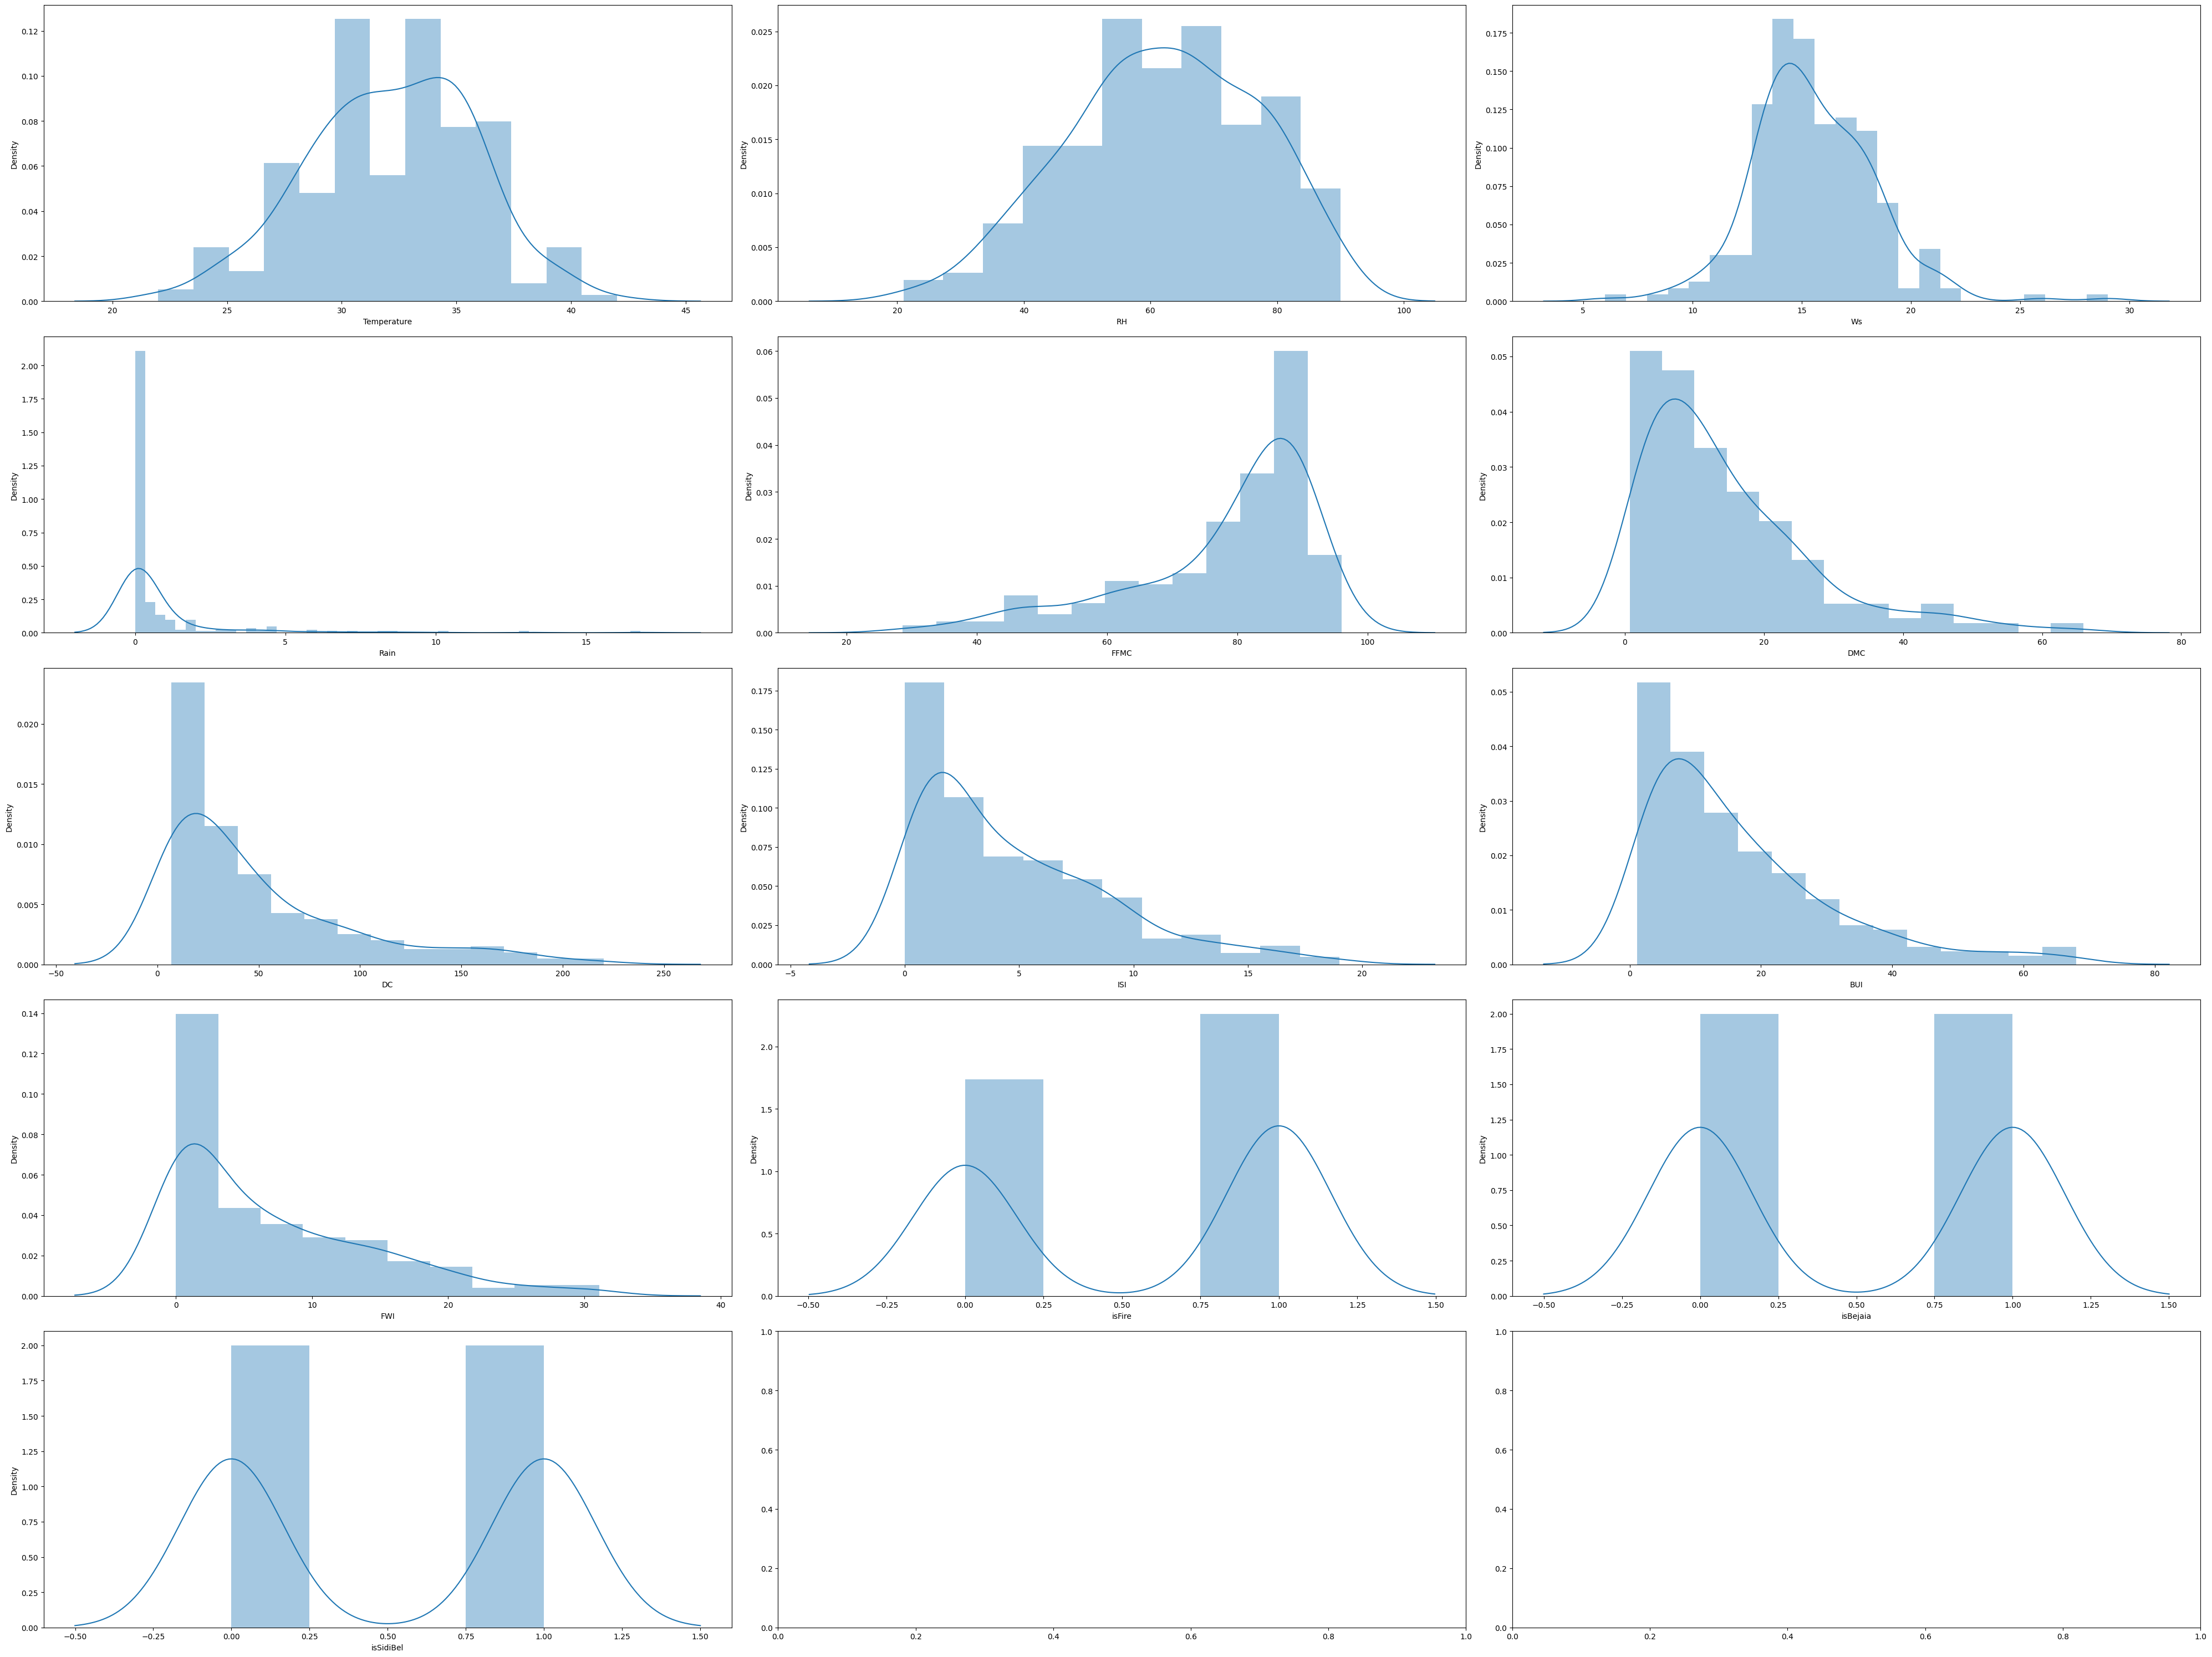

In [51]:
fig, axes=plt.subplots(5,3,figsize=(40,30))
r=c=0
for col in features_raw.columns:
    sns.distplot(features_raw[col],ax=axes[r,c])
    if c==2:
        c=0
        r+=1
    else:
        c+=1
    plt.xlabel=col
plt.tight_layout()
plt.show()

<Axes: >

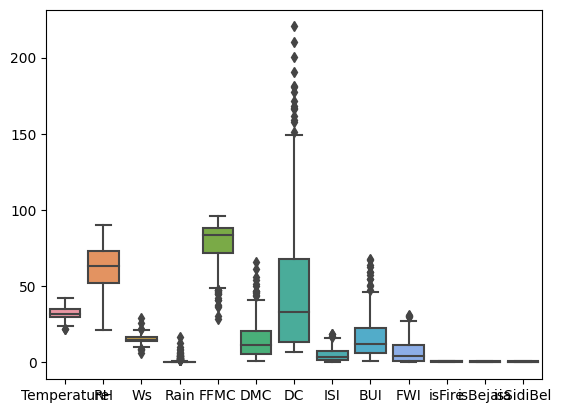

In [52]:
sns.boxplot(features_raw)

In [53]:
features_raw[col]

1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
242    1.0
243    1.0
244    1.0
245    1.0
246    1.0
Name: isSidiBel, Length: 244, dtype: float64

So there are outliers:
- Rain (Need more indepth analysis *probably Deletion*)
- FFMC (yeojohnson)
- DMC  (log)
- FWI

In [54]:
features_raw.describe()
iqr


<function scipy.stats._stats_py.iqr(x, axis=None, rng=(25, 75), scale=1.0, nan_policy='propagate', interpolation='linear', keepdims=False)>

<Axes: ylabel='RH'>

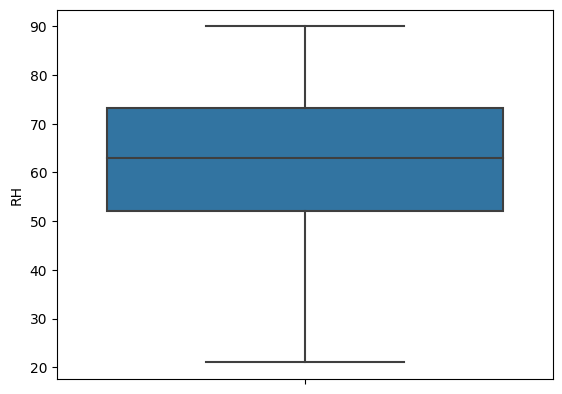

In [55]:
# Function to extract outlier

def outlier(dataset:pd.Series,quantile_range=(0.25,0.75)):
    q1=dataset.quantile(quantile_range[0])
    q3=dataset.quantile(quantile_range[1])
    
    
    iqrValue=q3-q1
    
    lower_limit=q1-(1.5*iqrValue)
    
    upper_limit=q3+(1.5*iqrValue)
    return pd.concat([dataset[dataset>=upper_limit], dataset[dataset<=lower_limit]])

outlier(features_raw['RH'])
sns.boxplot(y=features_raw['RH'])

In [56]:
from scipy import stats
ind={}

for col in features_raw.drop('Rain',axis=1).columns:
    out=outlier(features_raw[col] ,quantile_range=(0.25,0.75))
    
    for i in out.index:
        if i in ind:
            ind[i].append(col)
            
        else:
            ind[i]=[col]

ind=pd.Series(ind)
ind
# deletable=ind.apply(lambda x: x if len(x)>=1 else np.nan)
# deletable=deletable[deletable.notna()]
# deletable

94         [Temperature, FFMC]
106    [Temperature, Ws, FFMC]
3                   [Ws, FFMC]
53                        [Ws]
244                 [Ws, FFMC]
179                       [Ws]
202                       [Ws]
235                       [Ws]
240                       [Ws]
4                       [FFMC]
16                      [FFMC]
17                      [FFMC]
93                      [FFMC]
95                      [FFMC]
105                     [FFMC]
107                     [FFMC]
121                     [FFMC]
122                     [FFMC]
140                     [FFMC]
217                     [FFMC]
243                     [FFMC]
86              [DMC, DC, BUI]
87              [DMC, DC, BUI]
88              [DMC, DC, BUI]
89              [DMC, DC, BUI]
90         [DMC, DC, BUI, FWI]
176                      [DMC]
177                      [DMC]
208                 [DMC, BUI]
209                 [DMC, BUI]
210        [DMC, DC, BUI, FWI]
211        [DMC, DC, BUI, FWI]
212     

In [57]:
feature_rmvout=features_raw.drop('Rain',axis=1).drop(ind.index)

In [58]:
feature_rmvout

Temperature    RH    Ws  FFMC   DMC     DC  ISI   BUI   FWI  isFire  \
1           29.0  57.0  18.0  65.7   3.4    7.6  1.3   3.4   0.5       0   
2           29.0  61.0  13.0  64.4   4.1    7.6  1.0   3.9   0.4       0   
5           27.0  77.0  16.0  64.8   3.0   14.2  1.2   3.9   0.5       0   
6           31.0  67.0  14.0  82.6   5.8   22.2  3.1   7.0   2.5       1   
7           33.0  54.0  13.0  88.2   9.9   30.5  6.4  10.9   7.2       1   
..           ...   ...   ...   ...   ...    ...  ...   ...   ...     ...   
239         35.0  56.0  14.0  89.0  29.4  115.6  7.5  36.0  15.2       1   
241         28.0  70.0  15.0  79.9  13.8   36.1  2.4  14.1   3.0       0   
242         30.0  65.0  14.0  85.4  16.0   44.5  4.5  16.9   6.5       1   
245         24.0  54.0  18.0  79.7   4.3   15.2  1.7   5.1   0.7       0   
246         24.0  64.0  15.0  67.3   3.8   16.5  1.2   4.8   0.5       0   

     isBejaia  isSidiBel  
1         1.0        0.0  
2         1.0        0.0  
5         1.0        0.0  
6         1.0        0.0  
7         1.0        0.0  
..        ...        ...  
239       0.0        1.0  
241       0.0        1.0  
242       0.0        1.0  
245       0.0        1.0  
246       0.0        1.0  

[200 rows x 12 columns]

# First route:
### Using outlier removed data for ml

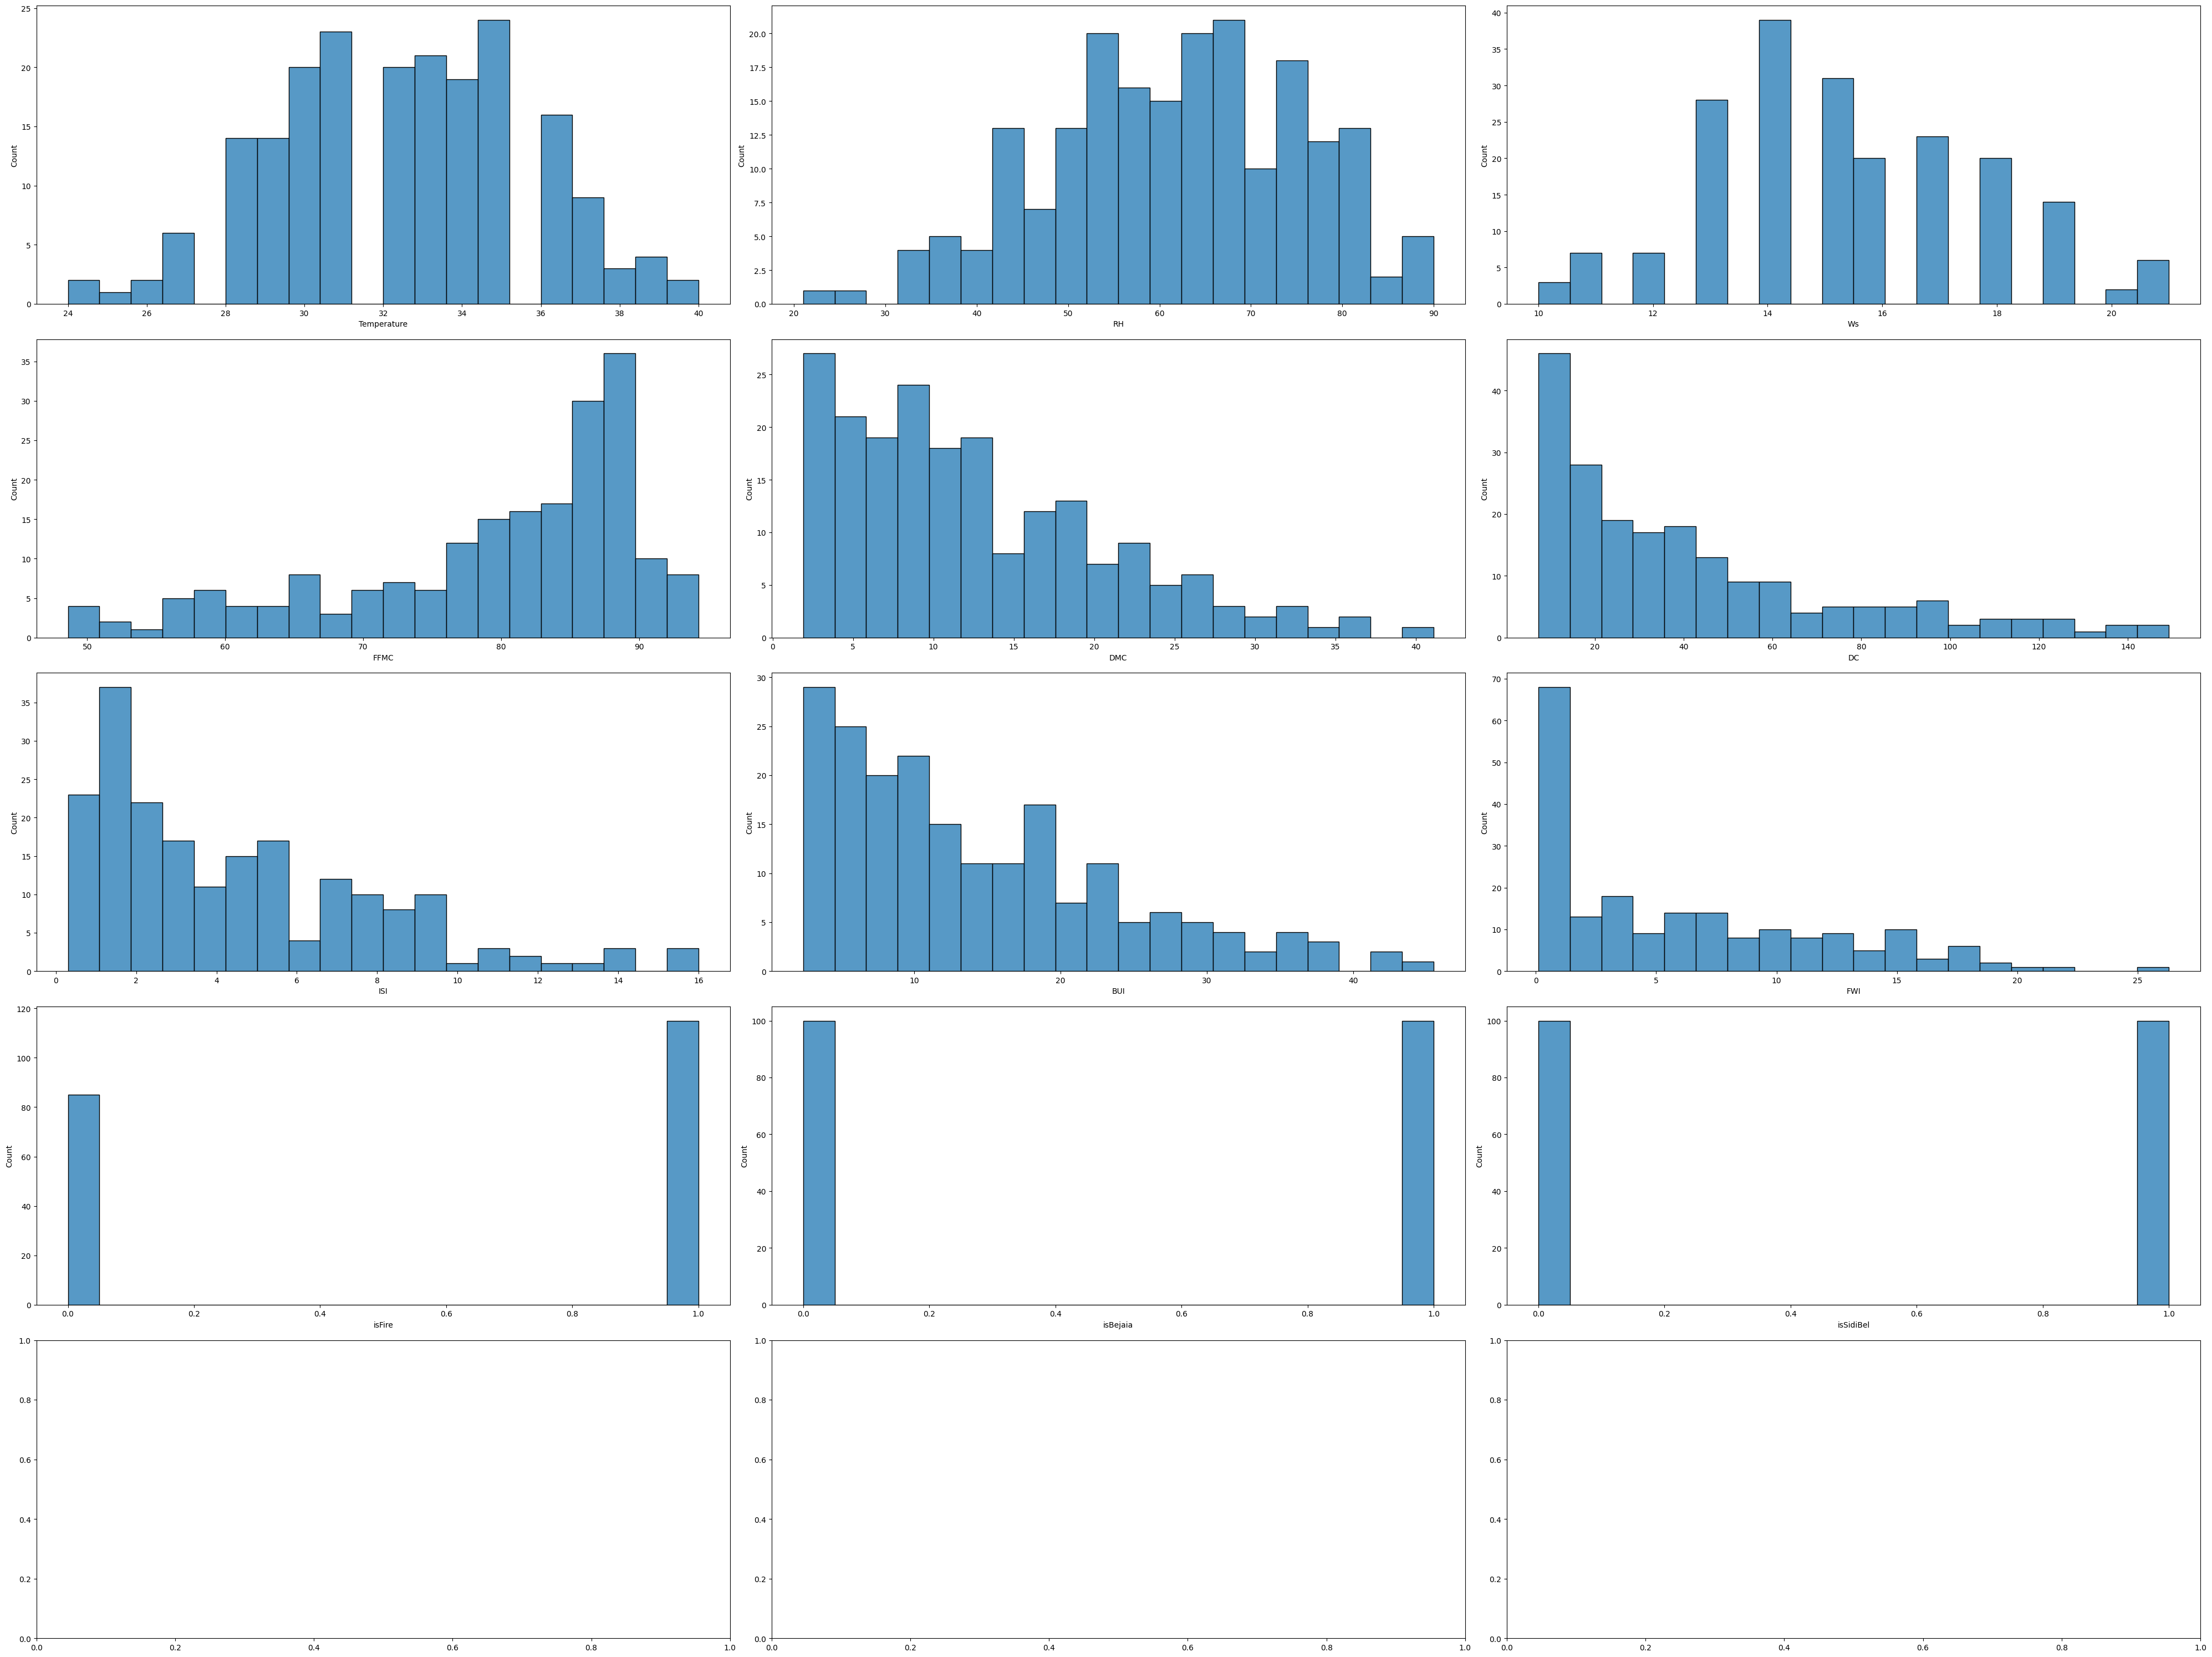

In [59]:
fig, axes=plt.subplots(5,3,figsize=(40,30))
r=c=0
for col in feature_rmvout.columns:
    sns.histplot(feature_rmvout[col],ax=axes[r,c],bins=20)
    if c==2:
        c=0
        r+=1
    else:
        c+=1
    plt.xlabel=col
plt.tight_layout()
plt.show()

In [60]:
# Source: https://github.com/krishnaik06/Gaussian-Trnasformaion/blob/master/Untitled1.ipynb



def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    print(col)
    plt.show()

Temperature


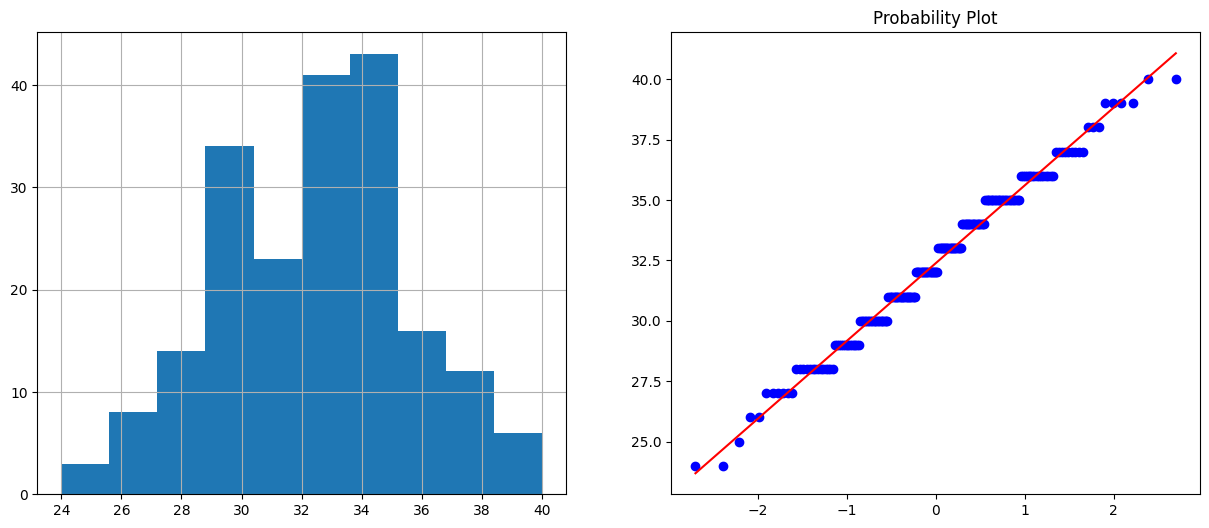

RH


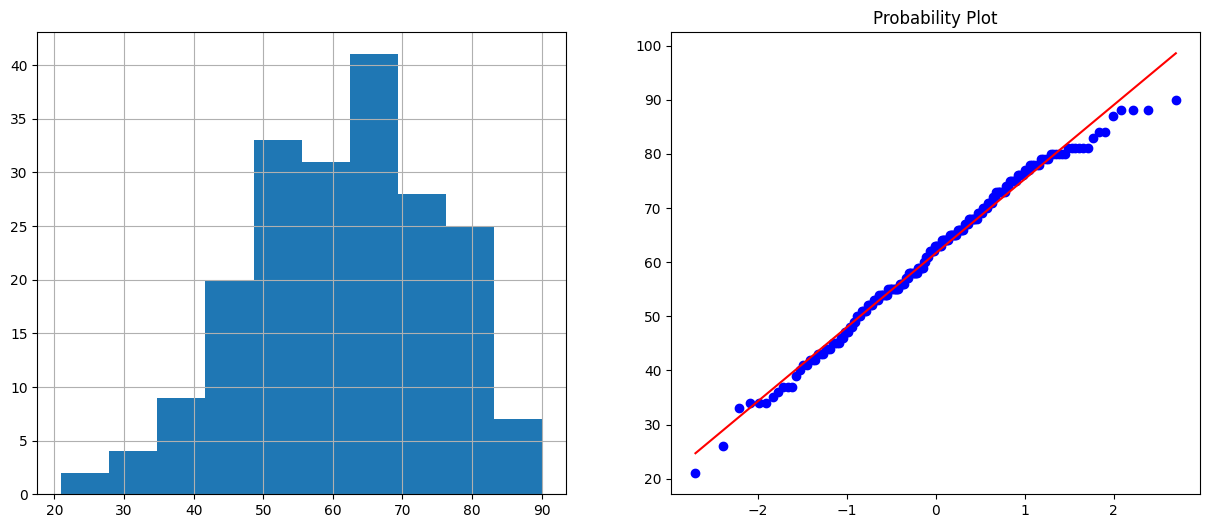

Ws


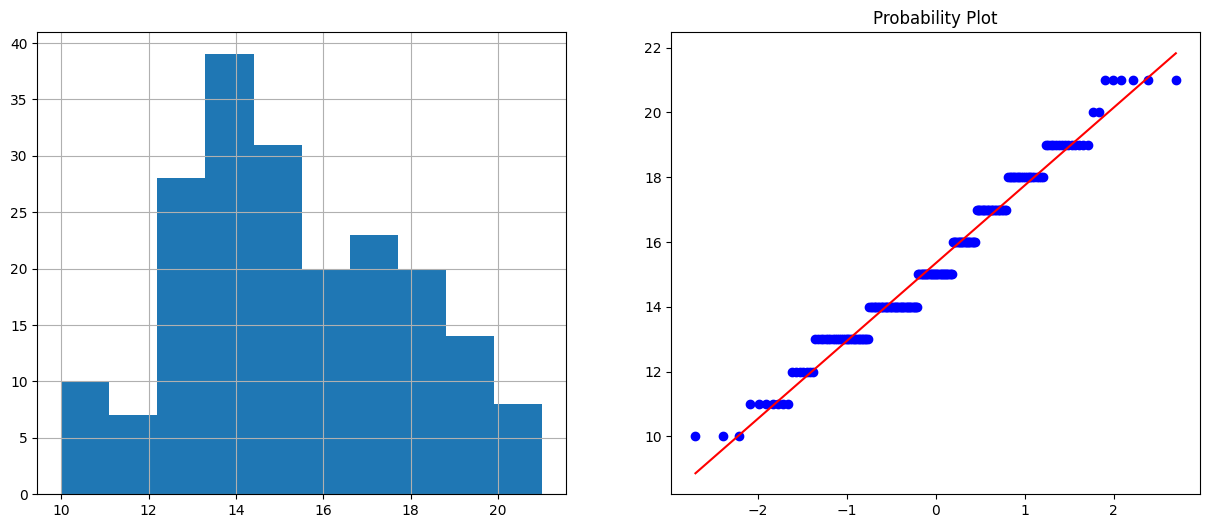

FFMC


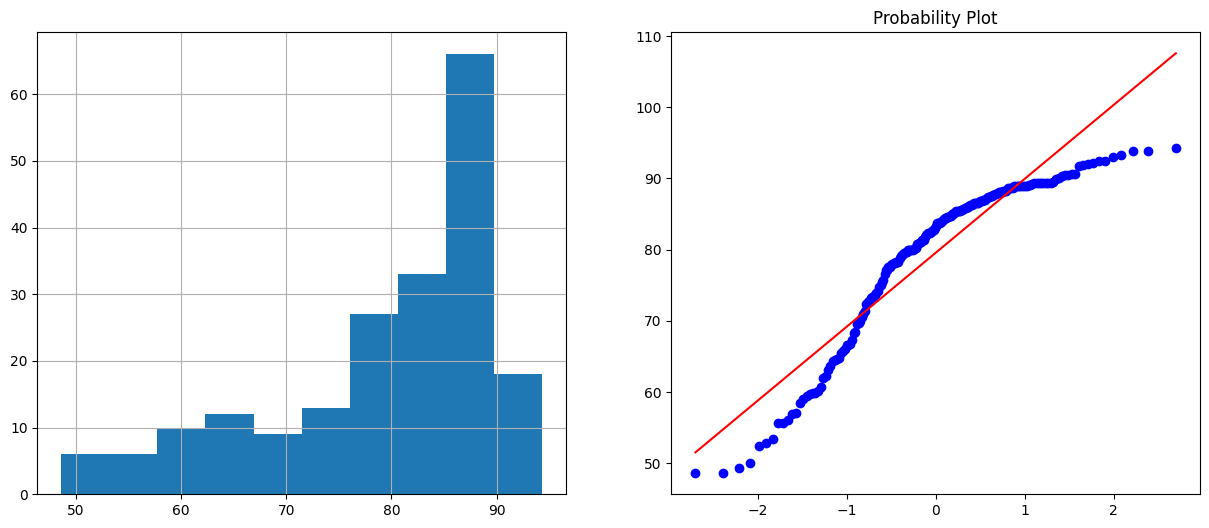

DMC


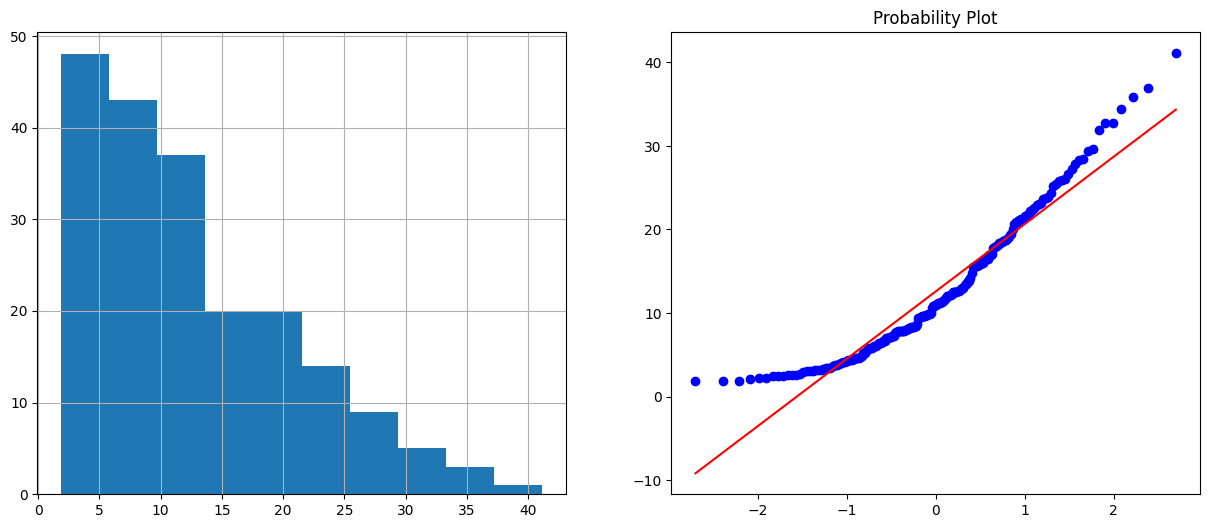

DC


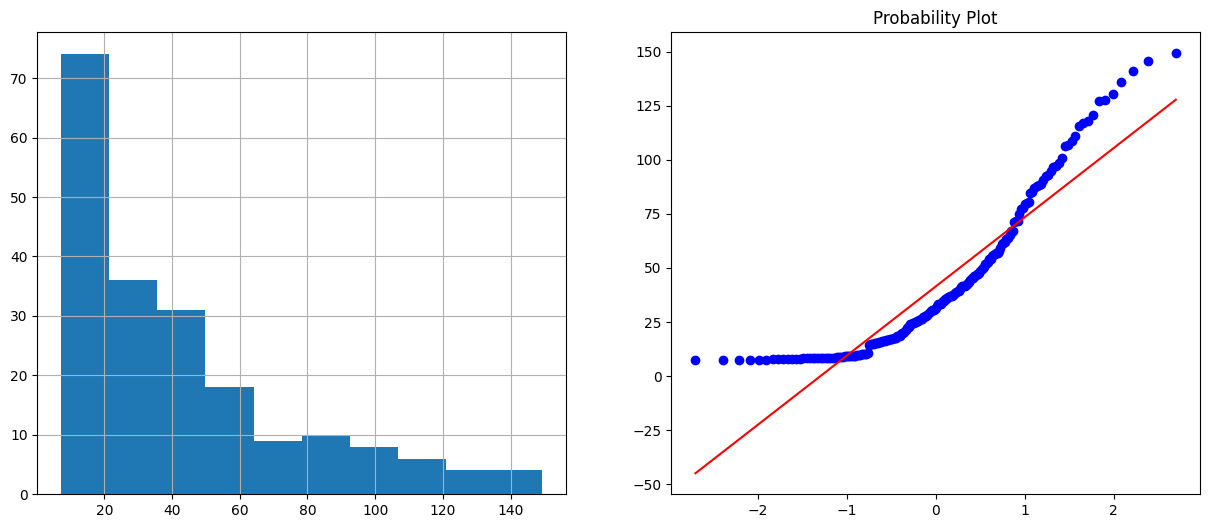

ISI


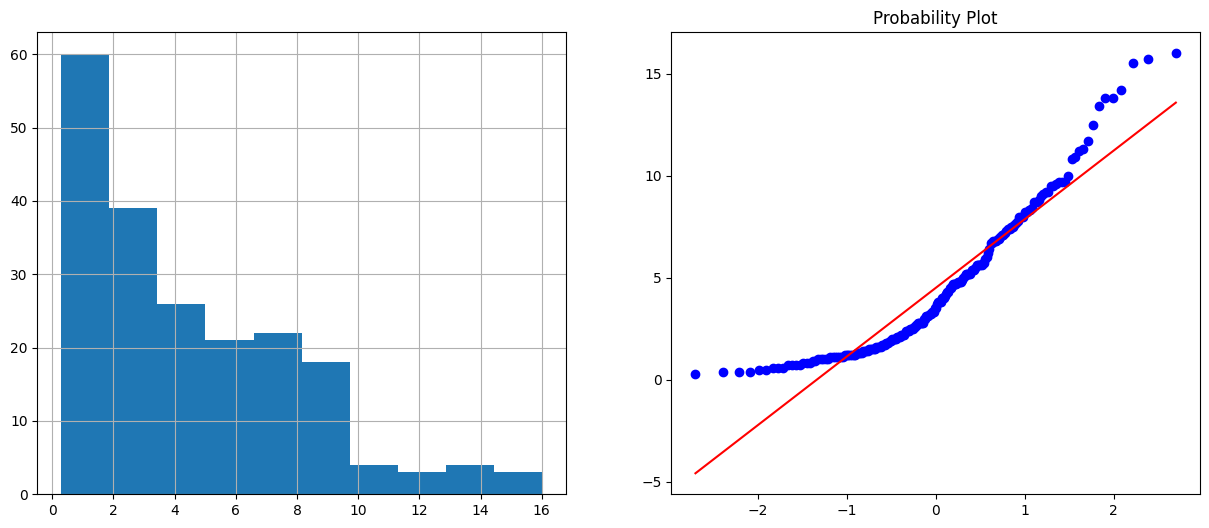

BUI


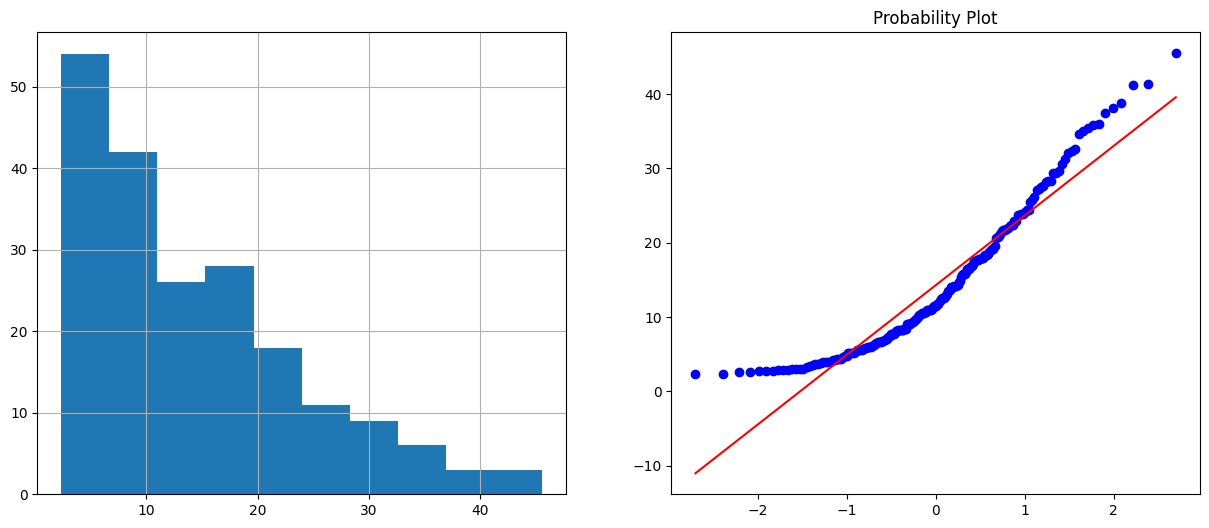

FWI


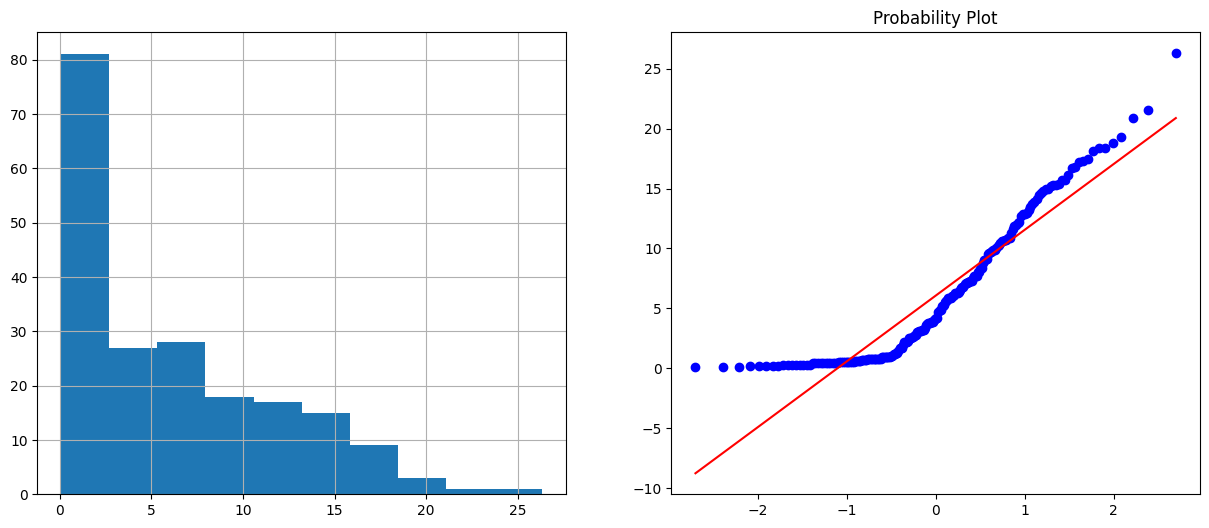

isFire


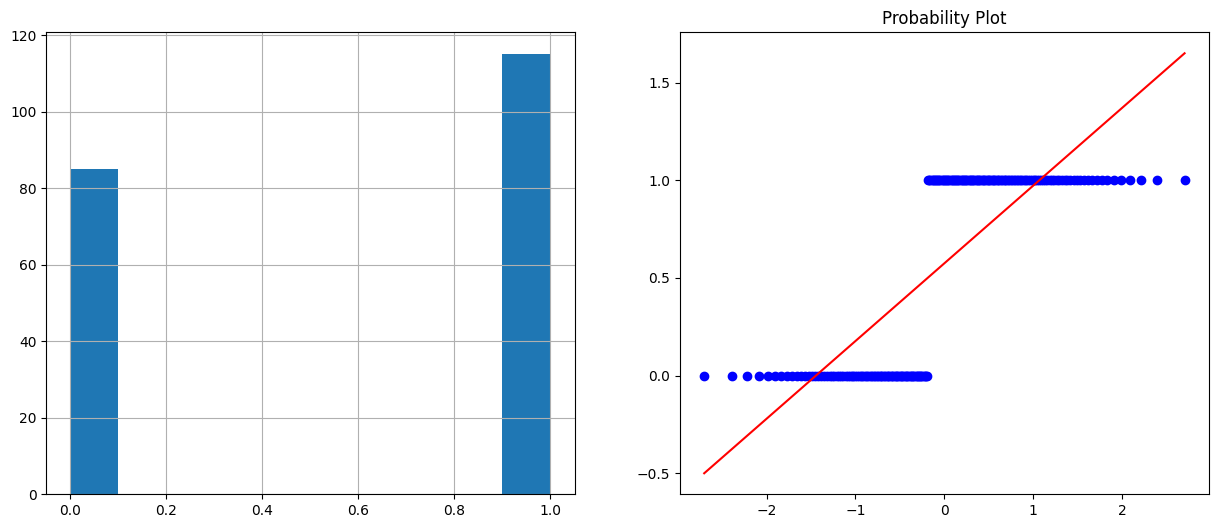

isBejaia


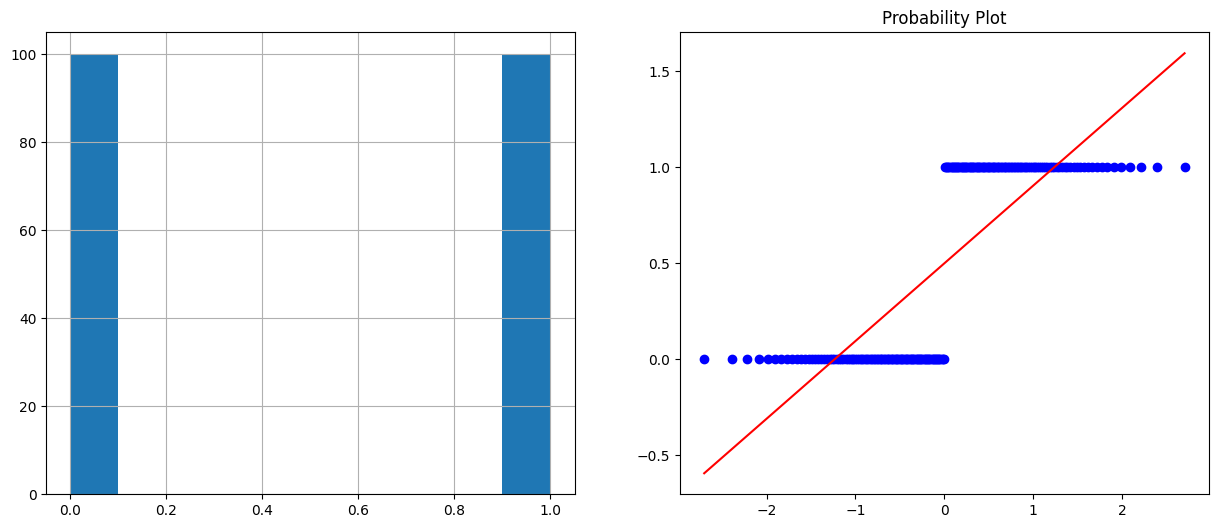

isSidiBel


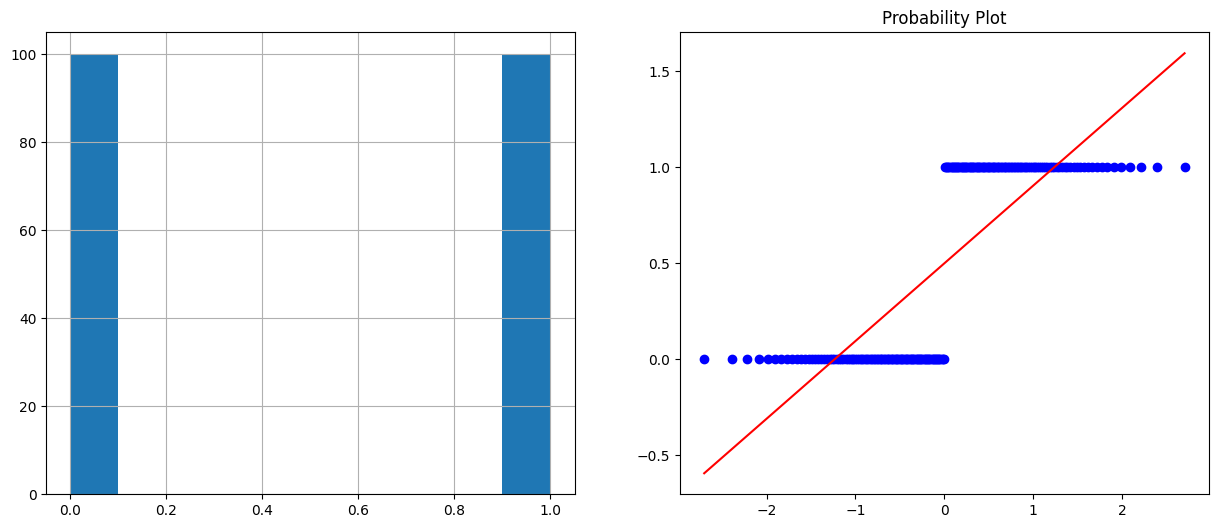

In [61]:
for col in feature_rmvout.columns:
    diagnostic_plots(feature_rmvout,col)

As seen from importlib.metadata import distribution
from the distributiion analysis of the outlier removed graph there are some transformation to be done to convert various non gaussian distribution to be converted into gaussian distribution

1. Handling FFMC

In [62]:
from sklearn.preprocessing import quantile_transform
def q_norm(s:pd.Series):
    return quantile_transform((1/s).values.reshape(-1,1),output_distribution='normal')


In [63]:


fro_normal=feature_rmvout.copy(deep=True)
fro_normal['FFMC']=quantile_transform((1/feature_rmvout['FFMC']).values.reshape(-1,1),output_distribution='normal')

# plt.hist()

C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (200). n_quantiles is set to n_samples.
  warnings.warn(


<Axes: ylabel='Frequency'>

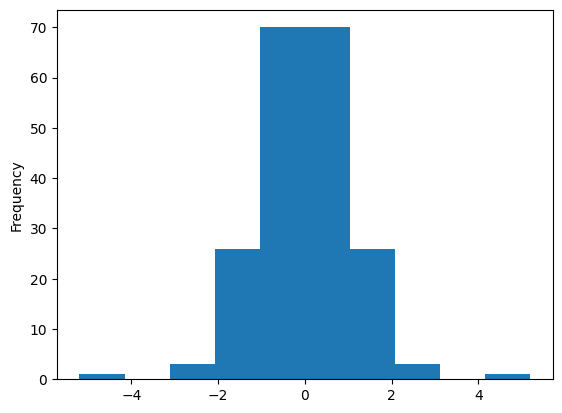

In [64]:
fro_normal['FFMC'].plot.hist()

2. Handling Ws

<Axes: xlabel='Ws', ylabel='Count'>

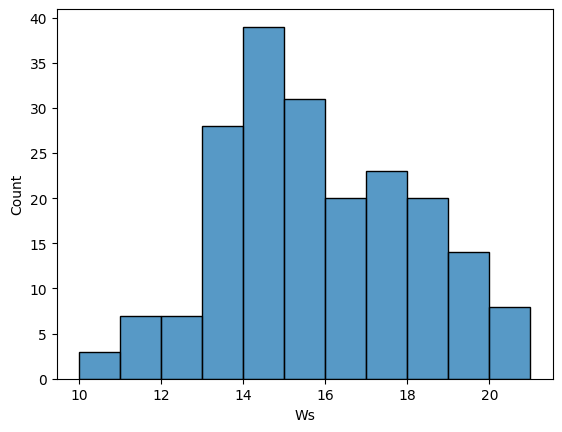

In [65]:
sns.histplot((feature_rmvout['Ws']))
# Will gaussianize later as it is already almost normal

3. Handling DMC

<Axes: ylabel='Frequency'>

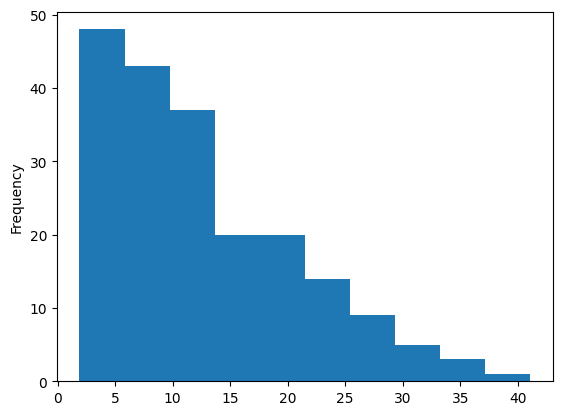

In [66]:
fro_normal['DMC'].plot.hist()

<Axes: ylabel='Frequency'>

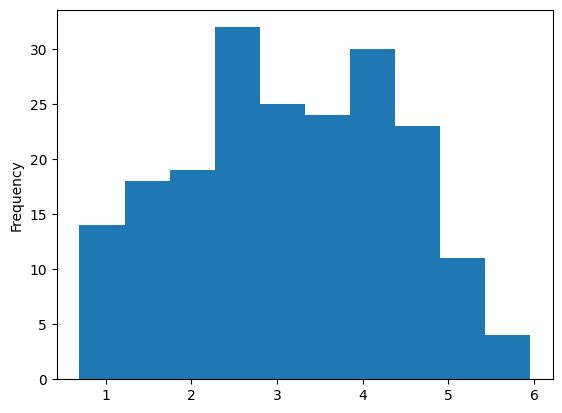

In [67]:
fro_normal['DMC']=boxcox(fro_normal['DMC'])[0]
fro_normal['DMC'].plot.hist()

4. Handling DC

C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (200). n_quantiles is set to n_samples.
  warnings.warn(


<Axes: ylabel='Frequency'>

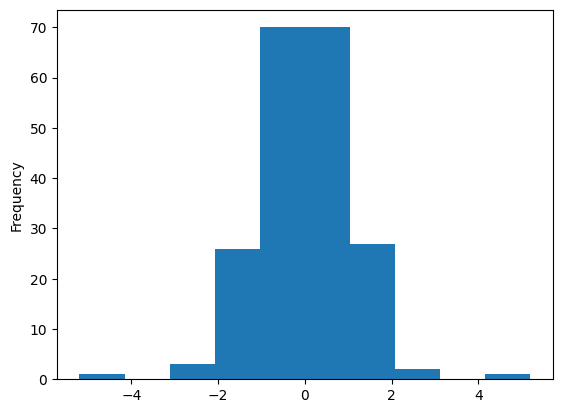

In [68]:
fro_normal['DC']=q_norm(fro_normal['DC'])
fro_normal['DC'].plot.hist()

5. Handling ISI

<Axes: ylabel='Frequency'>

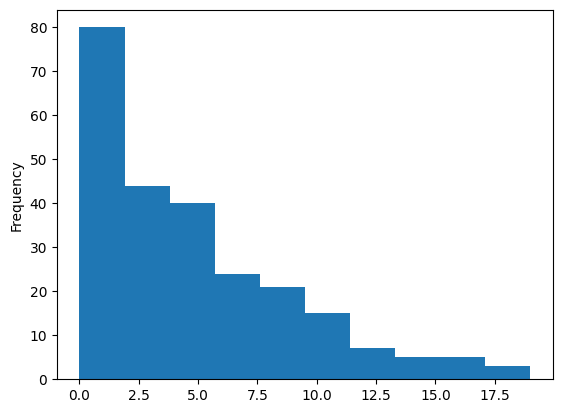

In [69]:
features_raw['ISI'].plot.hist()

<Axes: xlabel='ISI', ylabel='Count'>

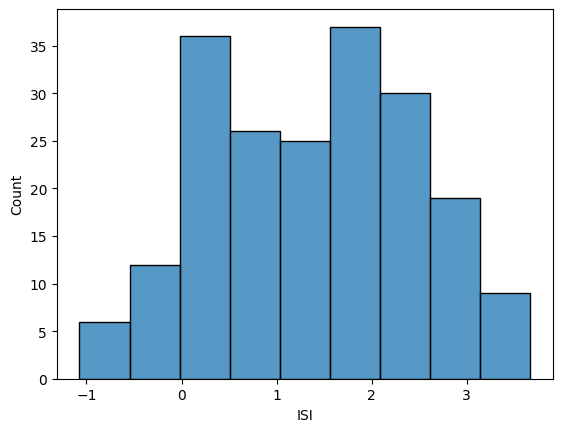

In [70]:
fro_normal['ISI']=boxcox(fro_normal['ISI'])[0]
sns.histplot((fro_normal['ISI']))

6. Handling BUI

<Axes: xlabel='BUI', ylabel='Count'>

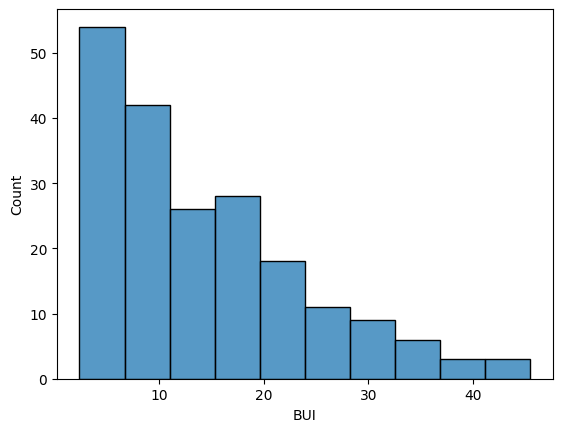

In [71]:
sns.histplot(fro_normal['BUI'])

<Axes: xlabel='BUI', ylabel='Count'>

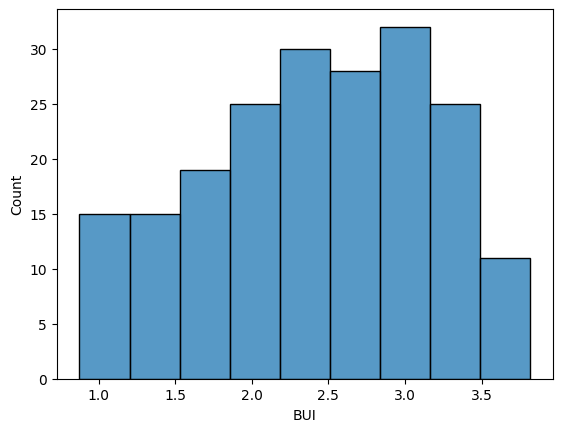

In [72]:
fro_normal['BUI']=np.log(fro_normal['BUI'])
sns.histplot((fro_normal['BUI']))

7. Handling BUI

In [73]:
fro_normal['FWI']= q_norm(feature_rmvout['FWI'])

C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (200). n_quantiles is set to n_samples.
  warnings.warn(


<Axes: ylabel='Frequency'>

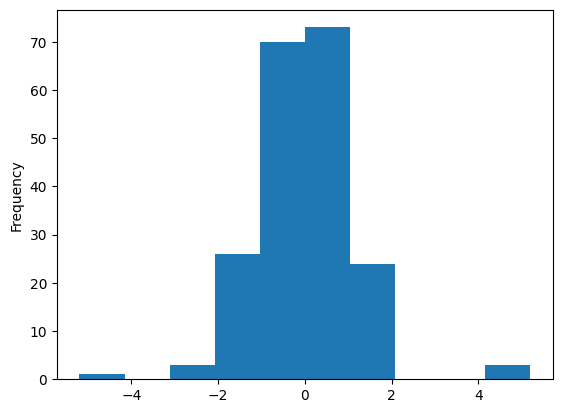

In [74]:
fro_normal['FWI'].plot.hist()

Temperature


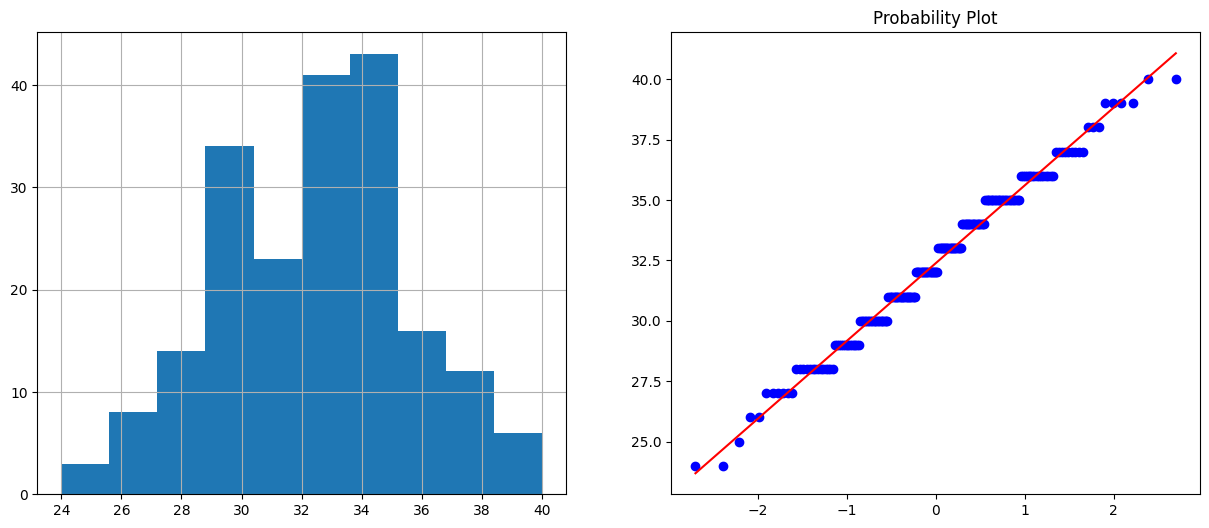

RH


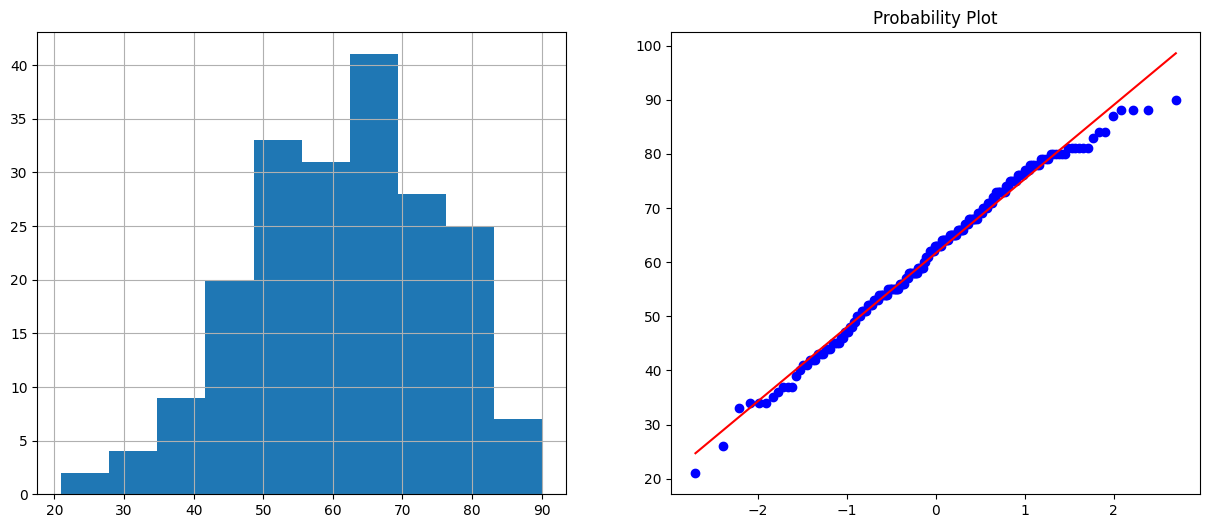

Ws


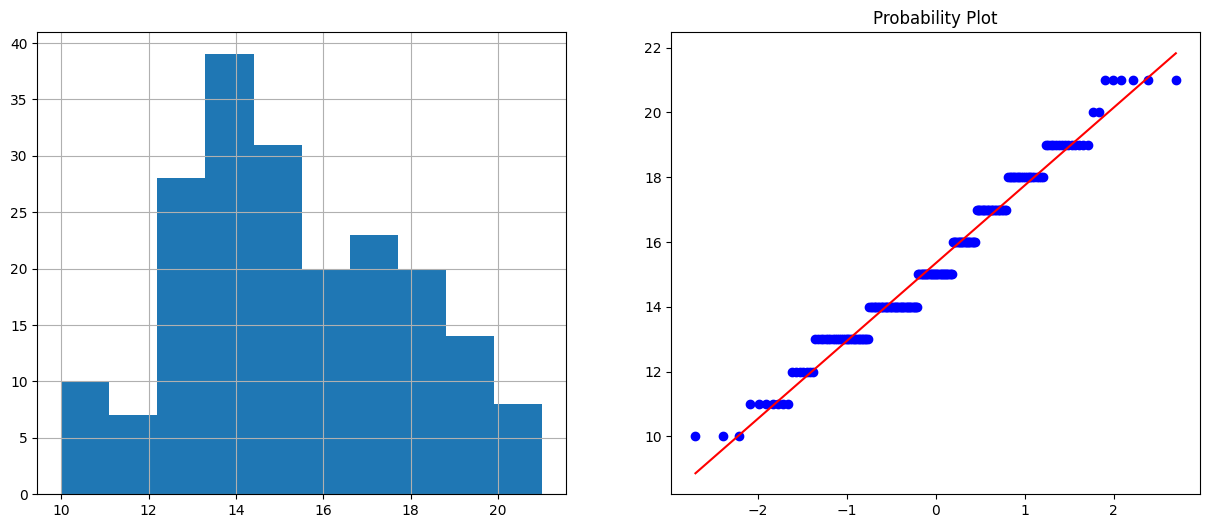

FFMC


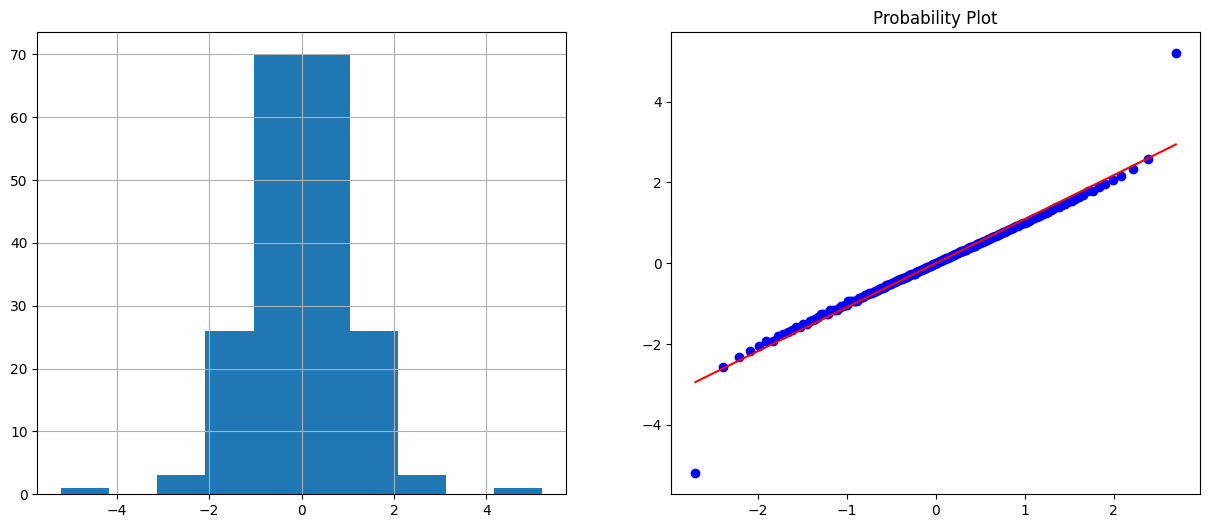

DMC


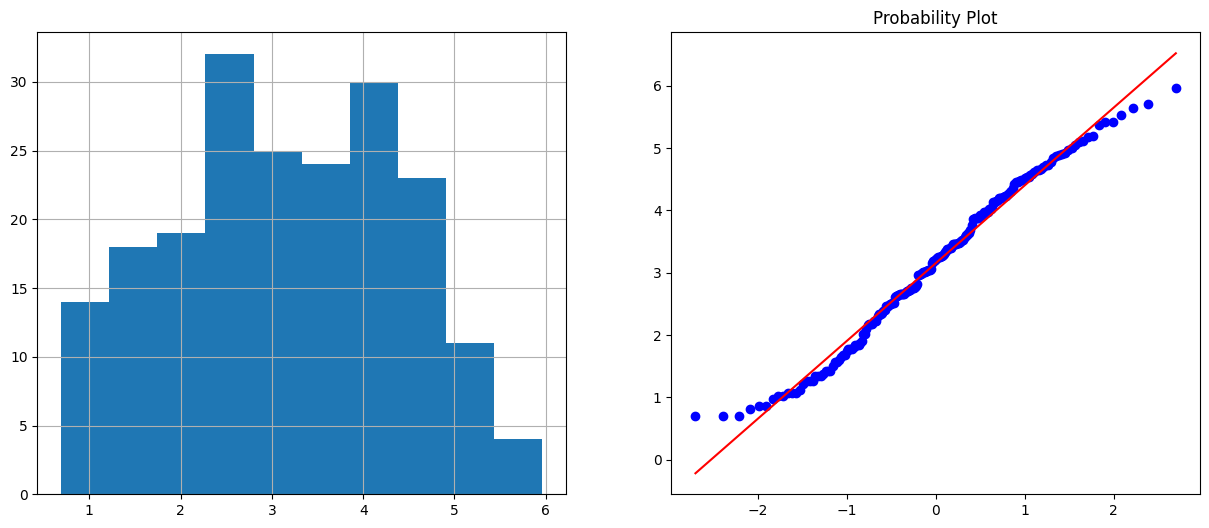

DC


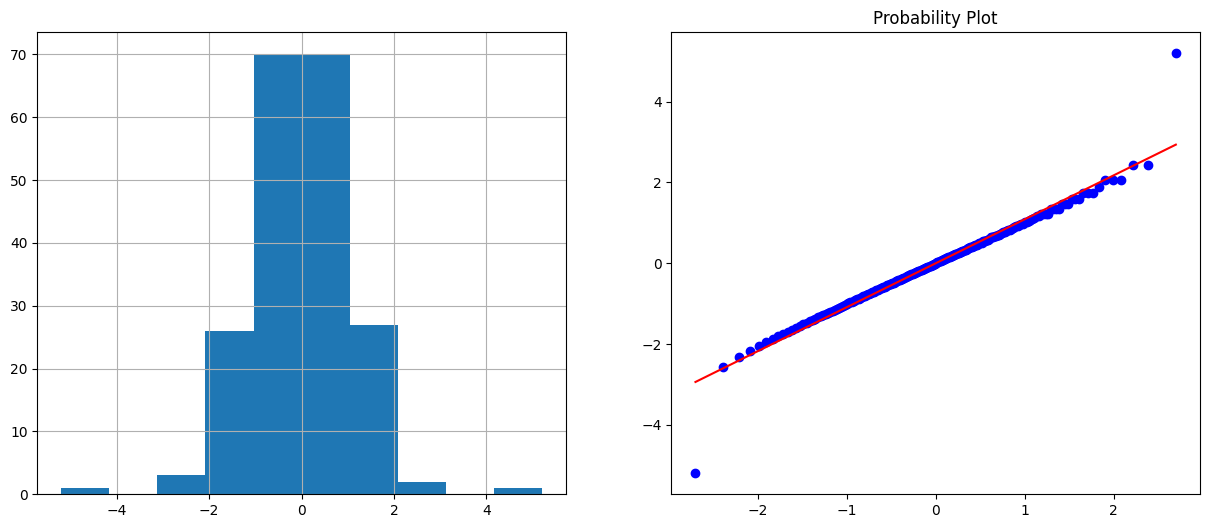

ISI


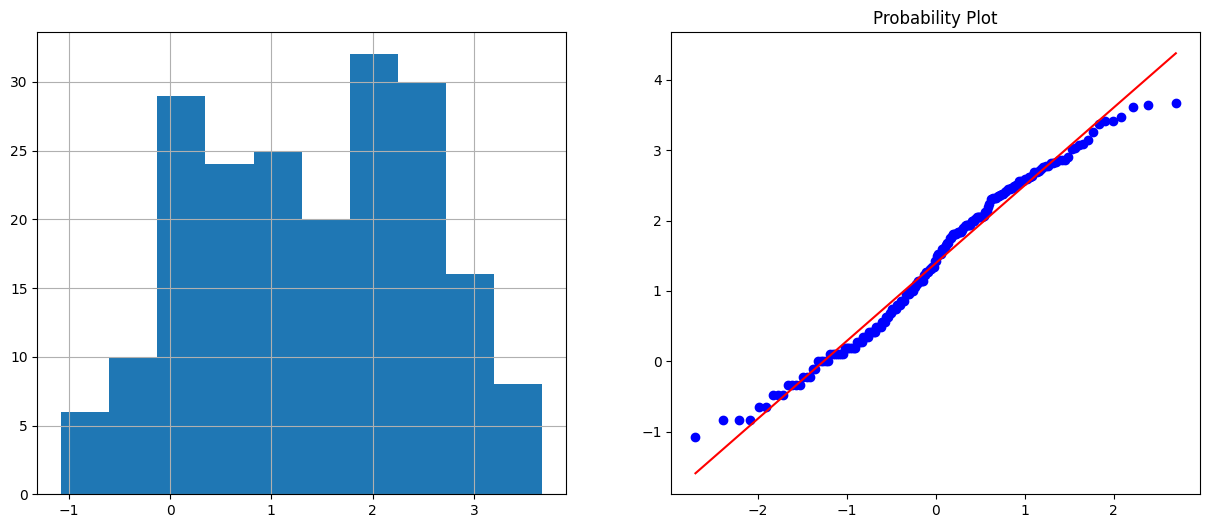

BUI


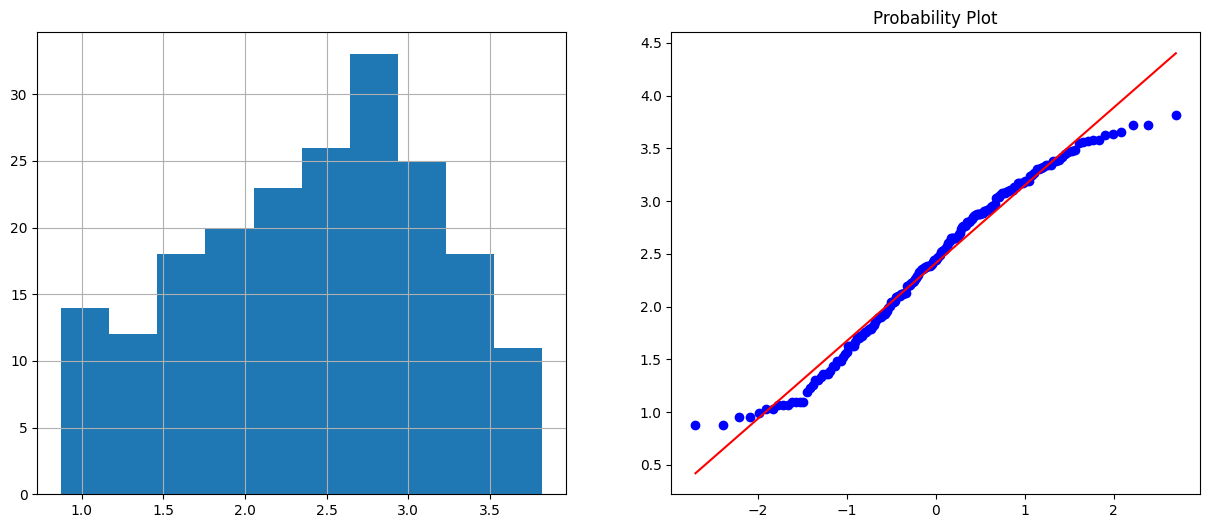

FWI


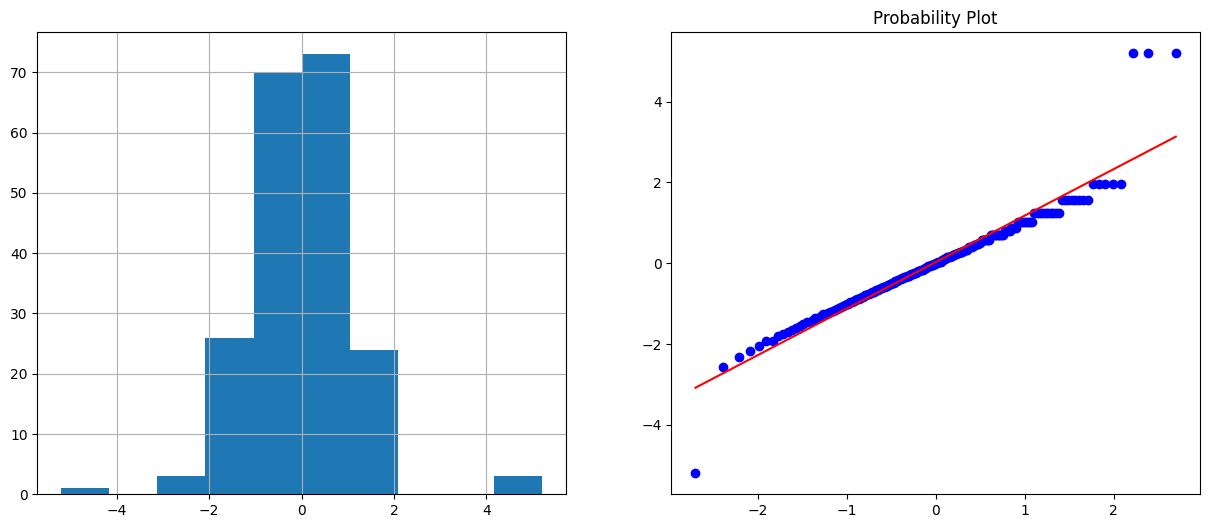

isFire


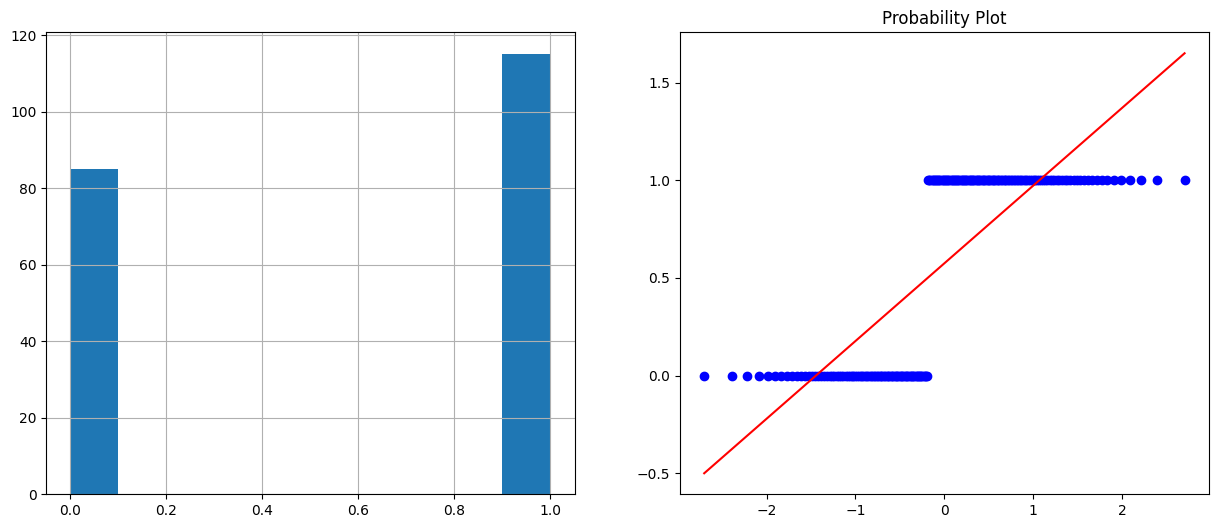

isBejaia


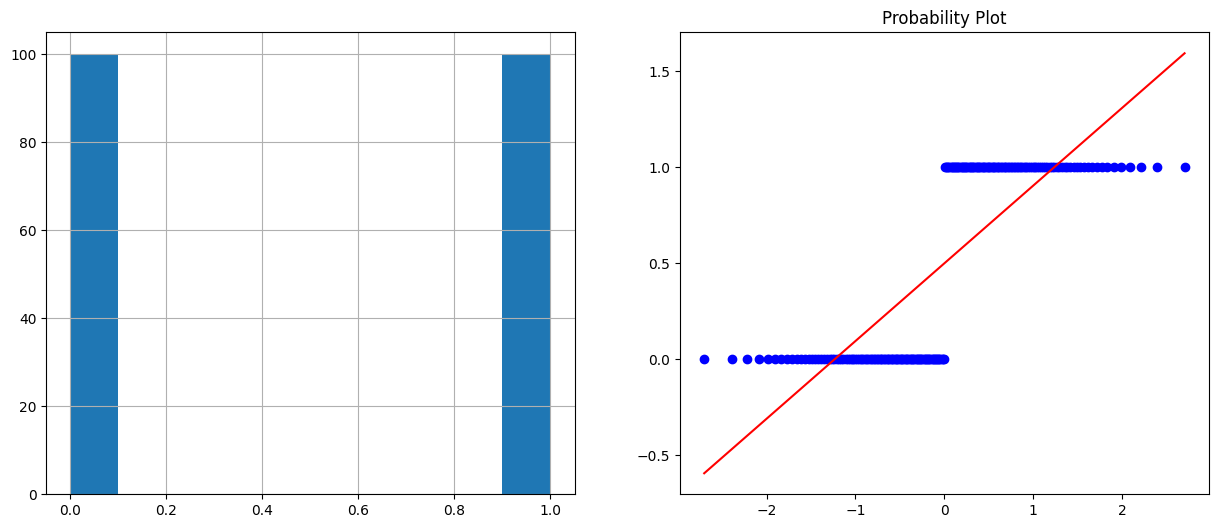

isSidiBel


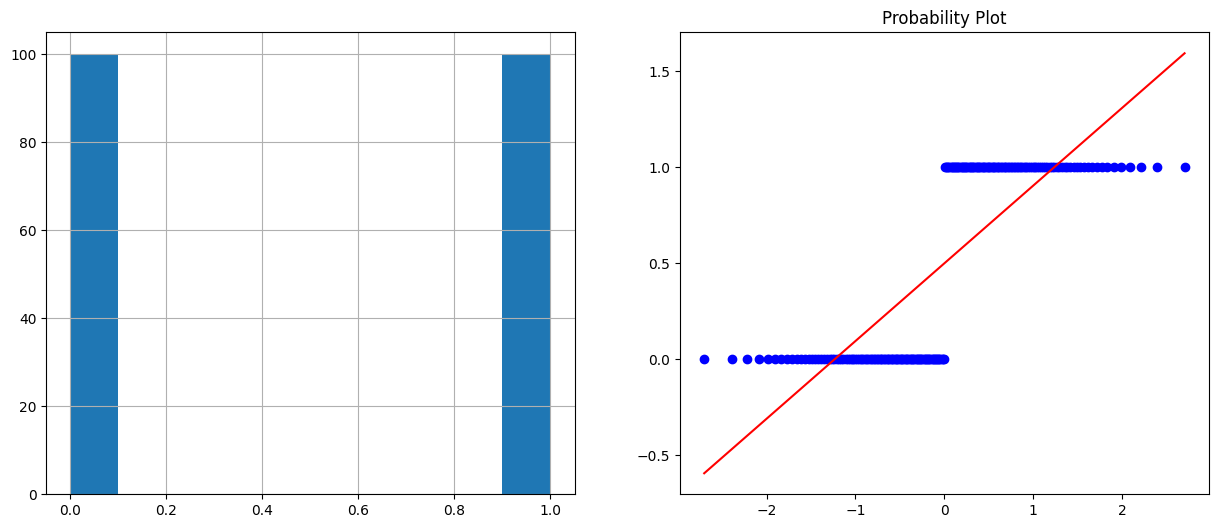

In [75]:
for col in fro_normal.columns:
    diagnostic_plots(fro_normal,col)

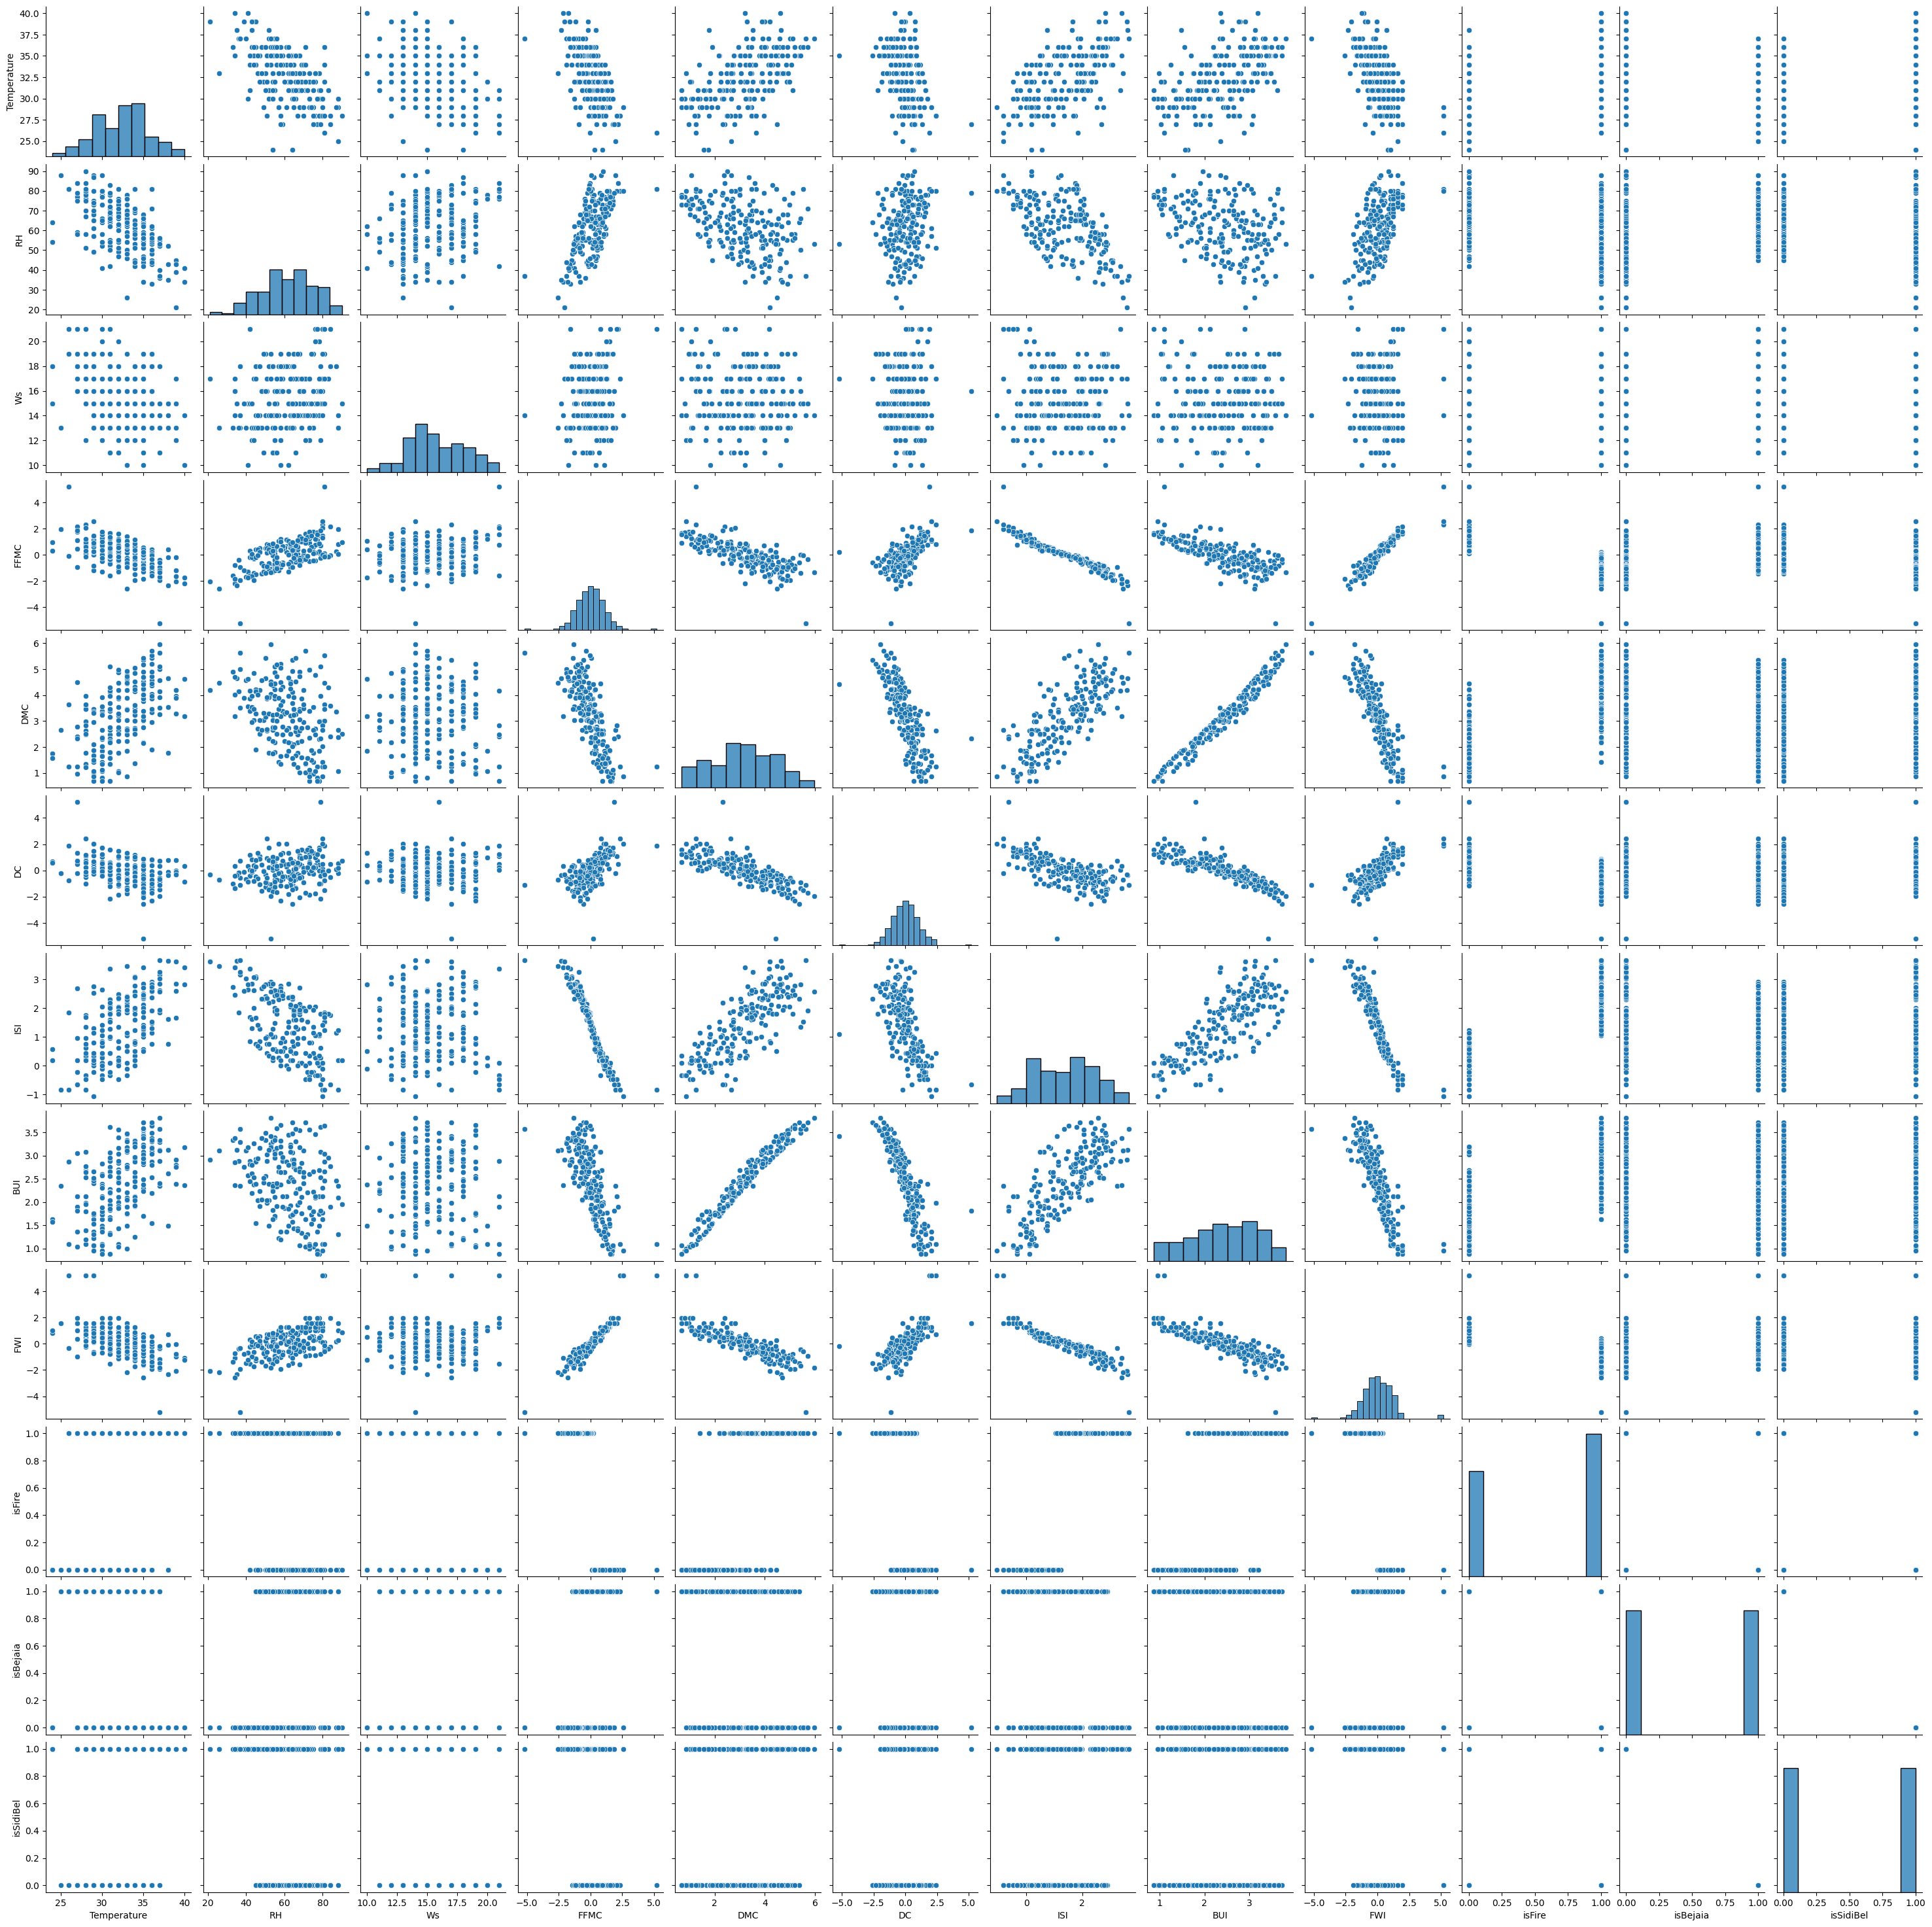

In [76]:
sns.pairplot(fro_normal)

In [77]:
fro_normal.corrwith(fro_normal['Temperature'])

Temperature    1.000000
RH            -0.618412
Ws            -0.278495
FFMC          -0.598891
DMC            0.536513
DC            -0.393164
ISI            0.587412
BUI            0.494552
FWI           -0.563588
isFire         0.468613
isBejaia      -0.231187
isSidiBel      0.231187
dtype: float64

In [78]:
fro_normal.corr()

Temperature        RH        Ws      FFMC       DMC        DC  \
Temperature     1.000000 -0.618412 -0.278495 -0.598891  0.536513 -0.393164   
RH             -0.618412  1.000000  0.208550  0.621901 -0.405455  0.181898   
Ws             -0.278495  0.208550  1.000000  0.178999 -0.065742 -0.016834   
FFMC           -0.598891  0.621901  0.178999  1.000000 -0.740681  0.590262   
DMC             0.536513 -0.405455 -0.065742 -0.740681  1.000000 -0.760400   
DC             -0.393164  0.181898 -0.016834  0.590262 -0.760400  1.000000   
ISI             0.587412 -0.583541 -0.026078 -0.940067  0.775910 -0.628195   
BUI             0.494552 -0.355483 -0.042318 -0.731474  0.981623 -0.832724   
FWI            -0.563588  0.538099  0.068224  0.942688 -0.810869  0.690301   
isFire          0.468613 -0.345963 -0.065855 -0.745819  0.688560 -0.597068   
isBejaia       -0.231187  0.366671  0.164072  0.217482 -0.193713 -0.124960   
isSidiBel       0.231187 -0.366671 -0.164072 -0.217482  0.193713  0.124960   

                  ISI       BUI       FWI    isFire  isBejaia  isSidiBel  
Temperature  0.587412  0.494552 -0.563588  0.468613 -0.231187   0.231187  
RH          -0.583541 -0.355483  0.538099 -0.345963  0.366671  -0.366671  
Ws          -0.026078 -0.042318  0.068224 -0.065855  0.164072  -0.164072  
FFMC        -0.940067 -0.731474  0.942688 -0.745819  0.217482  -0.217482  
DMC          0.775910  0.981623 -0.810869  0.688560 -0.193713   0.193713  
DC          -0.628195 -0.832724  0.690301 -0.597068 -0.124960   0.124960  
ISI          1.000000  0.770643 -0.902897  0.846207 -0.179853   0.179853  
BUI          0.770643  1.000000 -0.813808  0.700235 -0.090108   0.090108  
FWI         -0.902897 -0.813808  1.000000 -0.708146  0.158372  -0.158372  
isFire       0.846207  0.700235 -0.708146  1.000000 -0.131488   0.131488  
isBejaia    -0.179853 -0.090108  0.158372 -0.131488  1.000000  -1.000000  
isSidiBel    0.179853  0.090108 -0.158372  0.131488 -1.000000   1.000000

In [79]:
from enum import Enum
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge

class autoRidge:
    
    def __init__(self,x,y,test_size=.33,random_state=42) -> None:
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x,y,test_size=0.33,random_state=42)
        self.features=x.columns
        self.residual:float
        self.r2Score:float
        self.adj_r2:float
        self.mse:float
        self.mae:float
        self.rmse:float
        
        self.model:Ridge=Ridge()

    def normalize(self):
        self.scalar=StandardScaler()
        
        self.x_train=self.scalar.fit_transform(self.x_train)
        self.x_test=self.scalar.transform(self.x_test)
        
        return self
    
    def train(self):
        self.model=self.model.fit(self.x_train,self.y_train)
        return self.test()
        
    def test(self):
        self.y_pred = self.model.predict(self.x_test)
        
        self.residual   =   self.y_test-self.y_pred
        
        self.r2Score    =   r2_score(self.y_test,self.y_pred)
        self.adj_r2     =   100*(1-(1-self.r2Score)*(len(self.y_test)-1) / (len(self.y_test)-self.x_test.shape[1]-1))
        
        self.mse        =   mean_squared_error(self.y_test,self.y_pred)
        self.mae        =   mean_absolute_error(self.y_test,self.y_pred)
        self.rmse       =   sqrt(self.mse)
        
        return self

    def tune(self,a):
        self.model:Ridge = Ridge(a)
        return self.train()
    
    def perf(self):
        return {
            'residual':self.residual,
            'r2Score':self.r2Score,
            'adj_r2':self.adj_r2,
            'mse':self.mse,
            'mae':self.mae,
            'rmse':self.rmse,
        }
    def autotune(self):
        jumps=[10,1,0.1,0.01]
        alpha=0
        for j in jumps:
            while True:
                old=self.tune(alpha).adj_r2
                new=self.tune(alpha+j).adj_r2
                # print(f'jump:{j} ,o_alpha {alpha}: {old}, n_alpha {alpha+j}: {new}')
                if alpha==100 or old>=new:
                    break
                alpha+=j
        # print('_'*100)
        
        for j in jumps:
            if alpha-j<0:
                # print(alpha-j)
                continue
            while True:
                old=self.tune(alpha).adj_r2
                new=self.tune(alpha-j).adj_r2
                # print(f'jump:{j} ,o_alpha {alpha}: {old}, n_alpha {alpha-j}: {new}')
                if alpha==100 or old>=new:
                    break
                alpha-=j
        
        self.alpha=alpha
        self.tune(alpha)
        return self
    




In [148]:


class autoLasso:
    
    def __init__(self,x,y,test_size=.33,random_state=42) -> None:
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x,y,test_size=0.33,random_state=42)
        self.features=x.columns
        
        self.residual:float
        self.r2Score:float
        self.adj_r2:float
        self.mse:float
        self.mae:float
        self.rmse:float
        self.model=Lasso()

    def normalize(self):
        self.scalar=StandardScaler()
        
        self.x_train=self.scalar.fit_transform(self.x_train)
        self.x_test=self.scalar.transform(self.x_test)
        
        return self
    
    def train(self):
        self.model=self.model.fit(self.x_train,self.y_train)
        return self.test()
        
    def test(self):
        self.y_pred = self.model.predict(self.x_test)
        
        self.residual   =   self.y_test-self.y_pred
        
        self.r2Score    =   r2_score(self.y_test,self.y_pred)
        self.adj_r2     =   100*(1-(1-self.r2Score)*(len(self.y_test)-1) / (len(self.y_test)-self.x_test.shape[1]-1))
        
        self.mse        =   mean_squared_error(self.y_test,self.y_pred)
        self.mae        =   mean_absolute_error(self.y_test,self.y_pred)
        self.rmse       =   sqrt(self.mse)
        return self

    def tune(self,a):
        self.model = Lasso(a)
        return self.train()
    
    def perf(self):
        return {
            'residual':self.residual,
            'r2Score':self.r2Score,
            'adj_r2':self.adj_r2,
            'mse':self.mse,
            'mae':self.mae,
            'rmse':self.rmse,
        }
    def autotune(self):
        jumps=[10,1,0.1,0.01]
        alpha=0
        for j in jumps:
            while True:
                old=self.tune(alpha).adj_r2
                new=self.tune(alpha+j).adj_r2
                # print(f'jump:{j} ,o_alpha {alpha}: {old}, n_alpha {alpha+j}: {new}')
                if alpha>100 or old>=new:
                    break
                alpha+=j
        
        for j in jumps:
            if alpha-j<0:
                # print(alpha-j)
                continue
            while True:
                old=self.tune(alpha).adj_r2
                new=self.tune(alpha-j).adj_r2
                # print(f'jump:{j} ,o_alpha {alpha}: {old}, n_alpha {alpha-j}: {new}')
                if alpha>100 or old>=new:
                    break
                alpha-=j
            
        self.alpha=alpha
        self.model=self.tune(alpha)
        return self





In [81]:

class autoElastic:
    
    def __init__(self,x,y,test_size=.33,random_state=42) -> None:
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x,y,test_size=0.33,random_state=42)
        
        self.model=ElasticNet()
        self.residual:float
        self.r2Score:float
        self.adj_r2:float
        self.mse:float
        self.mae:float
        self.rmse:float

    def normalize(self):
        self.scalar=StandardScaler()
        
        self.x_train=self.scalar.fit_transform(self.x_train)
        self.x_test=self.scalar.transform(self.x_test)
        
        return self
    
    def train(self):
        self.model=self.model.fit(self.x_train,self.y_train)
        return self.test()
        
    def test(self):
        self.y_pred = self.model.predict(self.x_test)
        
        self.residual   =   self.y_test-self.y_pred
        
        self.r2Score    =   r2_score(self.y_test,self.y_pred)
        self.adj_r2     =   100*(1-(1-self.r2Score)*(len(self.y_test)-1) / (len(self.y_test)-self.x_test.shape[1]-1))
        
        self.mse        =   mean_squared_error(self.y_test,self.y_pred)
        self.mae        =   mean_absolute_error(self.y_test,self.y_pred)
        self.rmse       =   sqrt(self.mse)
        return self
    def perf(self):
        return {
            'residual':self.residual,
            'r2Score':self.r2Score,
            'adj_r2':self.adj_r2,
            'mse':self.mse,
            'mae':self.mae,
            'rmse':self.rmse,
        }
    def tune(self,ratio=0.5,alpha=1):
        self.model = ElasticNet(l1_ratio=ratio,alpha=alpha,max_iter=100000)
        return self.train()

    
    def autotune(self):
        hps=0
        for j in [0.1,0.01,0.001]:
            while True:
                old=self.tune(  ratio=hps ).adj_r2
                new=self.tune(ratio=hps + j).adj_r2
                # print(f'jump:{j} ,o_alpha {hps}: {old}, n_alpha {hps+j}: {new}')
                if old>=new or hps==1.0:
                    break
                
                hps+=j

        for j in [0.1,0.01,0.001]:
            if hps-j<0:
                # print(hps-j)
                continue
            while True:
                old=self.tune(ratio=hps).adj_r2
                new=self.tune(ratio=hps-j).adj_r2
                # print(f'jump:{j} ,o_alpha {hps}: {old}, n_alpha {hps-j}: {new}')
                if old>=new or hps==1.0: 
                    break
                hps-=j
        self.ratio=hps
        hps=0
        for j in [10,1,0.1,0.01,0.001]:
            while True:
                old=self.tune(  ratio=self.ratio,alpha=hps ).adj_r2
                new=self.tune(  ratio=self.ratio,alpha=hps+j ).adj_r2
                # print(f'jump:{j} ,o_alpha {hps}: {old}, n_alpha {hps+j}: {new}')
                if old>=new or hps==1.0:
                    break
                
                hps+=j

        for j in [10,1,0.1,0.01,0.001]:
            if hps-j<0:
                # print(hps-j)
                continue
            while True:
                old=self.tune(  ratio=self.ratio,alpha=hps ).adj_r2
                new=self.tune(  ratio=self.ratio,alpha=hps - j).adj_r2
                # print(f'jump:{j} ,o_alpha {hps}: {old}, n_alpha {hps-j}: {new}')
                if old>=new or hps==1.0: 
                    break
                hps-=j
        self.alpha=hps
        self.tune(ratio=self.ratio,alpha=self.alpha)
        return self
    

In [82]:
target=fro_normal['Temperature']
target


1      29.0
2      29.0
5      27.0
6      31.0
7      33.0
       ... 
239    35.0
241    28.0
242    30.0
245    24.0
246    24.0
Name: Temperature, Length: 200, dtype: float64

In [83]:
features_p1=fro_normal.drop('Temperature',axis=1)

In [84]:
features_p1=features_p1.drop('isSidiBel',axis=1)

In [85]:
features_p1.head(1)

RH    Ws     FFMC       DMC        DC       ISI       BUI       FWI  \
1  57.0  18.0  1.05493  1.419403  2.051678  0.269148  1.223775  1.011959   

   isFire  isBejaia  
1       0       1.0

In [86]:
import itertools

def get_feature_combinations(features):
    all_combinations = []
    num_features = len(features)

    # Generate combinations for each combination size from 2 to num_features
    for r in range(2, num_features + 1):
        combinations_r = list(itertools.combinations(features, r))
        all_combinations.extend(combinations_r)

    return all_combinations

# Example usage:
features = features_p1.columns
combinations = get_feature_combinations(features)

# Print the combinations
for comb in combinations:
    print(comb)
feat_c=combinations

('RH', 'Ws')
('RH', 'FFMC')
('RH', 'DMC')
('RH', 'DC')
('RH', 'ISI')
('RH', 'BUI')
('RH', 'FWI')
('RH', 'isFire')
('RH', 'isBejaia')
('Ws', 'FFMC')
('Ws', 'DMC')
('Ws', 'DC')
('Ws', 'ISI')
('Ws', 'BUI')
('Ws', 'FWI')
('Ws', 'isFire')
('Ws', 'isBejaia')
('FFMC', 'DMC')
('FFMC', 'DC')
('FFMC', 'ISI')
('FFMC', 'BUI')
('FFMC', 'FWI')
('FFMC', 'isFire')
('FFMC', 'isBejaia')
('DMC', 'DC')
('DMC', 'ISI')
('DMC', 'BUI')
('DMC', 'FWI')
('DMC', 'isFire')
('DMC', 'isBejaia')
('DC', 'ISI')
('DC', 'BUI')
('DC', 'FWI')
('DC', 'isFire')
('DC', 'isBejaia')
('ISI', 'BUI')
('ISI', 'FWI')
('ISI', 'isFire')
('ISI', 'isBejaia')
('BUI', 'FWI')
('BUI', 'isFire')
('BUI', 'isBejaia')
('FWI', 'isFire')
('FWI', 'isBejaia')
('isFire', 'isBejaia')
('RH', 'Ws', 'FFMC')
('RH', 'Ws', 'DMC')
('RH', 'Ws', 'DC')
('RH', 'Ws', 'ISI')
('RH', 'Ws', 'BUI')
('RH', 'Ws', 'FWI')
('RH', 'Ws', 'isFire')
('RH', 'Ws', 'isBejaia')
('RH', 'FFMC', 'DMC')
('RH', 'FFMC', 'DC')
('RH', 'FFMC', 'ISI')
('RH', 'FFMC', 'BUI')
('RH', 'FFMC', '

In [87]:
model_ridge = [
    autoRidge(features_p1[list(i)], target).normalize().autotune() for i in feat_c
]

In [149]:
model_lasso = [
    autoLasso(features_p1[list(i)], target).normalize().autotune() for i in feat_c
]

C:\Users\Dvain\AppData\Local\Temp\ipykernel_8832\578652698.py:24: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.model=self.model.fit(self.x_train,self.y_train)
C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.515e+02, tolerance: 1.422e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/Rid

In [89]:
# autoElastic = [
#     autoElastic(features_p1[list(i)], target).normalize().autotune() for i in feat_c
# ]

In [228]:
modelr_df=pd.DataFrame(data={
    'models':model_ridge,
    'adj_r2':[i.adj_r2 for i in model_ridge],
    'mae':[i.mae for i in model_ridge],
    'mse':[i.mse for i in model_ridge],
    'rmse':[i.rmse for i in model_ridge]
    })
modelr_df

models     adj_r2       mae  \
0    <__main__.autoRidge object at 0x000001F7342B0B90>  45.816132  1.926391   
1    <__main__.autoRidge object at 0x000001F7371BDD10>  49.792748  1.838050   
2    <__main__.autoRidge object at 0x000001F73715ED10>  52.100896  1.760690   
3    <__main__.autoRidge object at 0x000001F7371F75D0>  48.725403  1.843650   
4    <__main__.autoRidge object at 0x000001F73715D210>  50.786797  1.786215   
..                                                 ...        ...       ...   
242  <__main__.autoRidge object at 0x000001F731A11C10>  52.739460  1.728251   
243  <__main__.autoRidge object at 0x000001F731CAAE50>  54.317810  1.686865   
244  <__main__.autoRidge object at 0x000001F731BC45D0>  48.108648  1.764756   
245  <__main__.autoRidge object at 0x000001F731CE51D0>  48.539865  1.818269   
246  <__main__.autoRidge object at 0x000001F731CA9B50>  52.302511  1.722717   

          mse      rmse  
0    5.674255  2.382069  
1    5.257815  2.292993  
2    5.016101  2.239665  
3    5.369590  2.317238  
4    5.153716  2.270180  
..        ...       ...  
242  4.631971  2.152201  
243  4.477278  2.115958  
244  5.085833  2.255179  
245  5.043570  2.245789  
246  4.610757  2.147267  

[247 rows x 5 columns]

In [135]:
modelr_df.sort_values('adj_r2',ascending=False)


models     adj_r2       mae  \
662  <__main__.autoRidge object at 0x000001F72027B4D0>  61.650581  1.411353   
874  <__main__.autoRidge object at 0x000001F7203F3310>  61.335979  1.409707   
628  <__main__.autoRidge object at 0x000001F720289590>  61.019901  1.417846   
843  <__main__.autoRidge object at 0x000001F720497490>  60.829865  1.408875   
666  <__main__.autoRidge object at 0x000001F7200BE150>  60.709755  1.420840   
..                                                 ...        ...       ...   
108  <__main__.autoRidge object at 0x000001F71EE6BE50>  20.201626  2.157080   
15   <__main__.autoRidge object at 0x000001F71CB2F050>  18.100988  2.241265   
33   <__main__.autoRidge object at 0x000001F71EDD2D50>  15.283524  2.225467   
44   <__main__.autoRidge object at 0x000001F71C805850>  14.478077  2.226472   
16   <__main__.autoRidge object at 0x000001F71EDA7A10>  -0.534252  2.535767   

          mse      rmse  
662  3.068284  1.751652  
874  3.041023  1.743853  
628  3.118744  1.765997  
843  3.080831  1.755229  
666  3.143558  1.773008  
..        ...       ...  
108  6.709196  2.590212  
15   6.996873  2.645160  
33   7.237577  2.690274  
44   7.306389  2.703033  
16   8.588936  2.930689  

[1013 rows x 5 columns]

In [150]:
modell_df=pd.DataFrame(data={
    'models':model_lasso,
    'adj_r2':[i.adj_r2 for i in model_lasso],
    'mae':[i.mae for i in model_lasso],
    'mse':[i.mse for i in model_lasso],
    'rmse':[i.rmse for i in model_lasso]
    })
modell_df

models     adj_r2       mae  \
0     <__main__.autoLasso object at 0x000001F7230C1390>  41.026276  1.849506   
1     <__main__.autoLasso object at 0x000001F725C6C7D0>  49.900105  1.701246   
2     <__main__.autoLasso object at 0x000001F725C6CB10>  55.245543  1.567871   
3     <__main__.autoLasso object at 0x000001F725630E10>  51.526678  1.635597   
4     <__main__.autoLasso object at 0x000001F725C557D0>  49.423450  1.693444   
...                                                 ...        ...       ...   
1008  <__main__.autoLasso object at 0x000001F729B82F10>  51.223857  1.581983   
1009  <__main__.autoLasso object at 0x000001F729B3A890>  54.711224  1.516328   
1010  <__main__.autoLasso object at 0x000001F7299166D0>  48.232440  1.596917   
1011  <__main__.autoLasso object at 0x000001F7260B5150>  45.370120  1.667352   
1012  <__main__.autoLasso object at 0x000001F729AB0590>  52.688817  1.532395   

           mse      rmse  
0     5.038298  2.244615  
1     4.280181  2.068860  
2     3.823504  1.955378  
3     4.141218  2.034998  
4     4.320903  2.078678  
...        ...       ...  
1008  3.704079  1.924598  
1009  3.439247  1.854521  
1010  3.931248  1.982738  
1011  4.148614  2.036815  
1012  3.528672  1.878476  

[1013 rows x 5 columns]

In [151]:
top5_l=modell_df.sort_values('adj_r2',ascending=False).head(5)
top5_l

models     adj_r2       mae  \
662  <__main__.autoLasso object at 0x000001F72613F1D0>  61.650581  1.411353   
874  <__main__.autoLasso object at 0x000001F729ACBF50>  61.335979  1.409707   
628  <__main__.autoLasso object at 0x000001F7260F9AD0>  61.002042  1.416352   
843  <__main__.autoLasso object at 0x000001F726153F90>  60.826616  1.408928   
666  <__main__.autoLasso object at 0x000001F72615D390>  60.655324  1.419712   

          mse      rmse  
662  3.068284  1.751652  
874  3.041023  1.743853  
628  3.120173  1.766401  
843  3.081086  1.755302  
666  3.147913  1.774236

In [152]:
for i in top5_l['models']:
    print(i.features,i.adj_r2)

Index(['RH', 'Ws', 'DMC', 'DC', 'ISI', 'BUI'], dtype='object') 61.65058141829973
Index(['RH', 'Ws', 'DMC', 'DC', 'ISI', 'BUI', 'isBejaia'], dtype='object') 61.335978790895894
Index(['RH', 'Ws', 'FFMC', 'DMC', 'DC', 'BUI'], dtype='object') 61.00204220669272
Index(['RH', 'Ws', 'FFMC', 'DMC', 'DC', 'BUI', 'isBejaia'], dtype='object') 60.82661640664209
Index(['RH', 'Ws', 'DMC', 'DC', 'BUI', 'FWI'], dtype='object') 60.65532414114912


In [140]:
top5_r=modelr_df.sort_values('adj_r2',ascending=False).head(5)
top5_r


models     adj_r2       mae  \
662  <__main__.autoRidge object at 0x000001F72027B4D0>  61.650581  1.411353   
874  <__main__.autoRidge object at 0x000001F7203F3310>  61.335979  1.409707   
628  <__main__.autoRidge object at 0x000001F720289590>  61.019901  1.417846   
843  <__main__.autoRidge object at 0x000001F720497490>  60.829865  1.408875   
666  <__main__.autoRidge object at 0x000001F7200BE150>  60.709755  1.420840   

          mse      rmse  
662  3.068284  1.751652  
874  3.041023  1.743853  
628  3.118744  1.765997  
843  3.080831  1.755229  
666  3.143558  1.773008

In [141]:
for i in top5_r['models']:
    print(i.features,i.adj_r2)

Index(['RH', 'Ws', 'DMC', 'DC', 'ISI', 'BUI'], dtype='object') 61.65058141857478
Index(['RH', 'Ws', 'DMC', 'DC', 'ISI', 'BUI', 'isBejaia'], dtype='object') 61.335978796424904
Index(['RH', 'Ws', 'FFMC', 'DMC', 'DC', 'BUI'], dtype='object') 61.01990073550381
Index(['RH', 'Ws', 'FFMC', 'DMC', 'DC', 'BUI', 'isBejaia'], dtype='object') 60.82986509590107
Index(['RH', 'Ws', 'DMC', 'DC', 'BUI', 'FWI'], dtype='object') 60.70975484418169


In [232]:
features_raw.to_csv('./algerian_preprocessed.csv')

# _______________________________________________________________________________________________________________________________________________

# Test 2
This time we try quantile_transformation on all of the features and see what happens


In [165]:
features_p2=features_raw.drop(['isFire', 'isBejaia', 'isSidiBel','Temperature'],axis=1).copy(deep=True)
features_p2

RH    Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI
1    57.0  18.0   0.0  65.7   3.4   7.6  1.3   3.4  0.5
2    61.0  13.0   1.3  64.4   4.1   7.6  1.0   3.9  0.4
3    82.0  22.0  13.1  47.1   2.5   7.1  0.3   2.7  0.1
4    89.0  13.0   2.5  28.6   1.3   6.9  0.0   1.7  0.0
5    77.0  16.0   0.0  64.8   3.0  14.2  1.2   3.9  0.5
..    ...   ...   ...   ...   ...   ...  ...   ...  ...
242  65.0  14.0   0.0  85.4  16.0  44.5  4.5  16.9  6.5
243  87.0  15.0   4.4  41.1   6.5   8.0  0.1   6.2  0.0
244  87.0  29.0   0.5  45.9   3.5   7.9  0.4   3.4  0.2
245  54.0  18.0   0.1  79.7   4.3  15.2  1.7   5.1  0.7
246  64.0  15.0   0.2  67.3   3.8  16.5  1.2   4.8  0.5

[244 rows x 9 columns]

In [181]:
features_p2.drop(['Rain'],axis=1,inplace=True)
features_p2

RH    Ws  FFMC   DMC    DC  ISI   BUI  FWI
1    57.0  18.0  65.7   3.4   7.6  1.3   3.4  0.5
2    61.0  13.0  64.4   4.1   7.6  1.0   3.9  0.4
3    82.0  22.0  47.1   2.5   7.1  0.3   2.7  0.1
4    89.0  13.0  28.6   1.3   6.9  0.0   1.7  0.0
5    77.0  16.0  64.8   3.0  14.2  1.2   3.9  0.5
..    ...   ...   ...   ...   ...  ...   ...  ...
242  65.0  14.0  85.4  16.0  44.5  4.5  16.9  6.5
243  87.0  15.0  41.1   6.5   8.0  0.1   6.2  0.0
244  87.0  29.0  45.9   3.5   7.9  0.4   3.4  0.2
245  54.0  18.0  79.7   4.3  15.2  1.7   5.1  0.7
246  64.0  15.0  67.3   3.8  16.5  1.2   4.8  0.5

[244 rows x 8 columns]

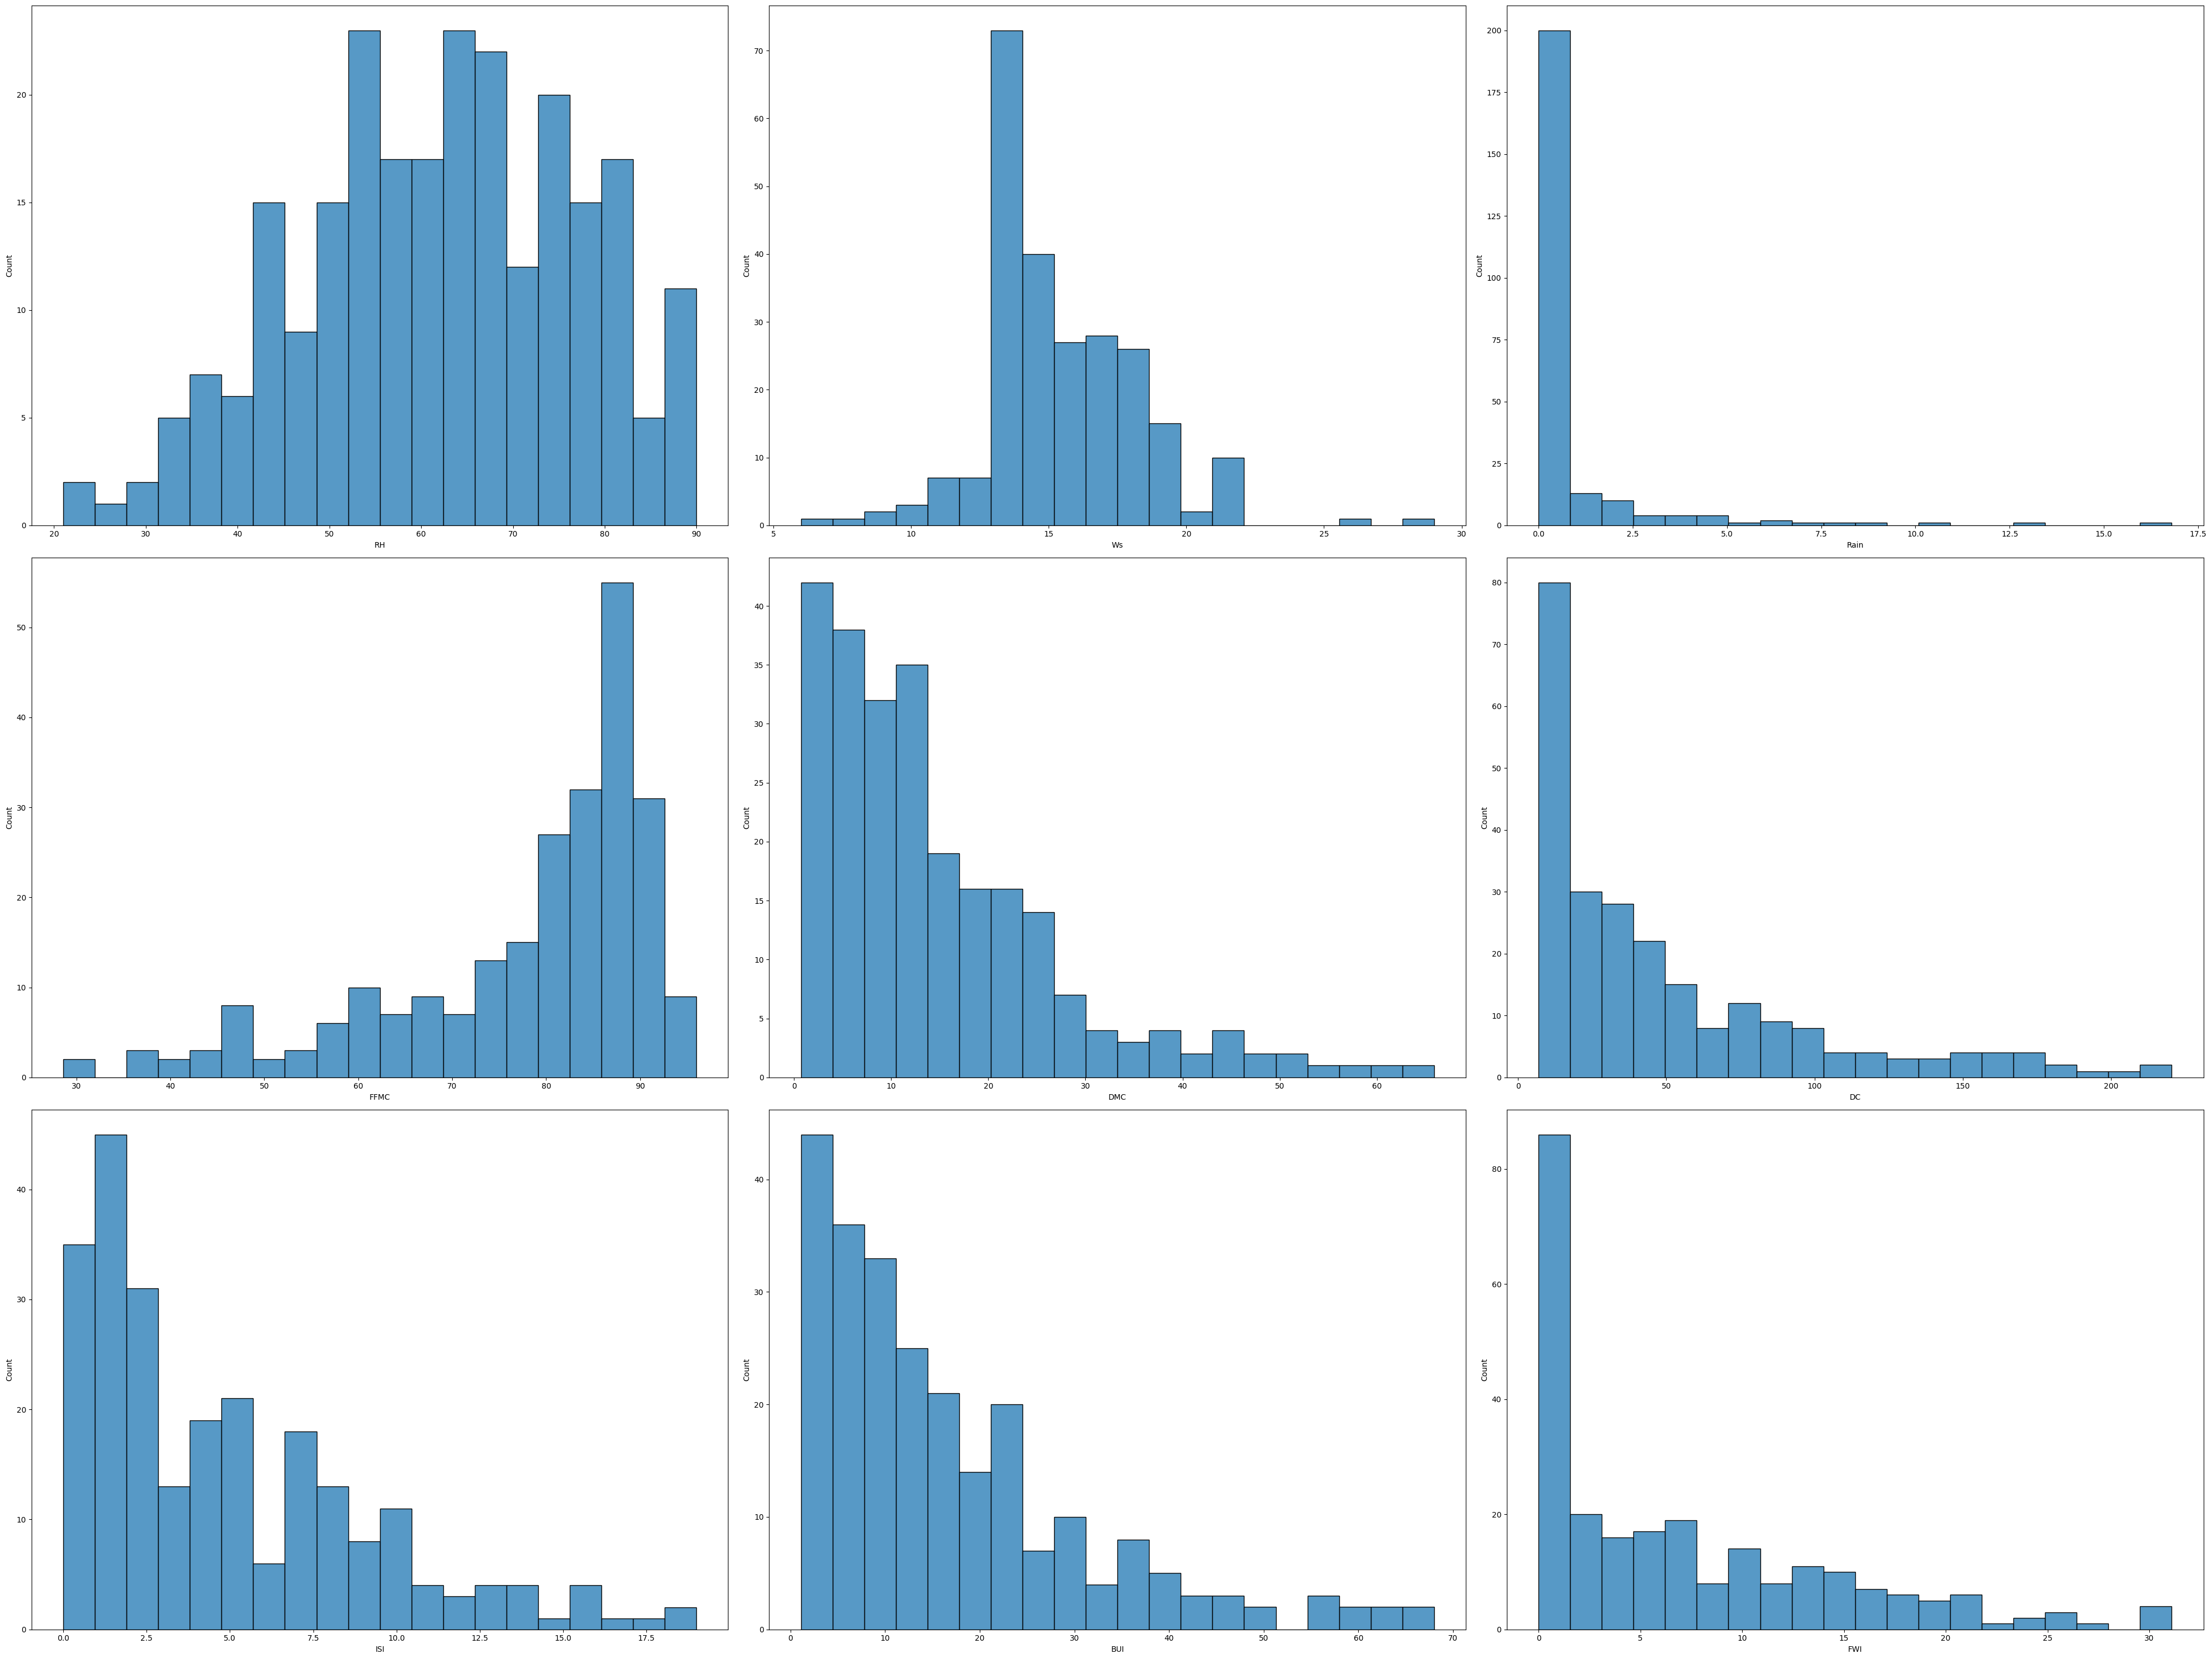

In [173]:
fig, axes=plt.subplots(3,3,figsize=(40,30))
r=c=0
for col in features_p2.columns:
    sns.histplot(features_p2[col],ax=axes[r,c],bins=20)
    if c==2:
        c=0
        r+=1
    else:
        c+=1
    plt.xlabel=col
    
plt.tight_layout()
plt.show()

<Axes: ylabel='Count'>

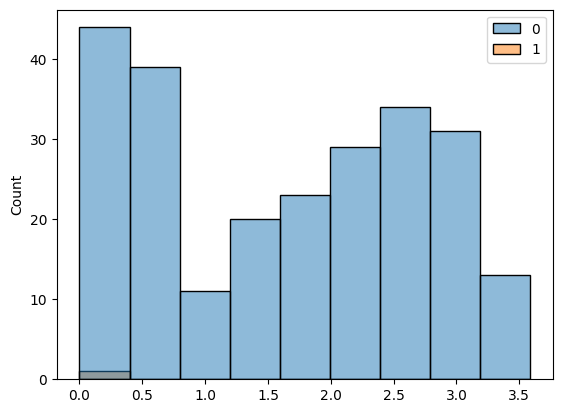

In [200]:
sns.histplot(yeojohnson(features_p2['FWI']))

C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(


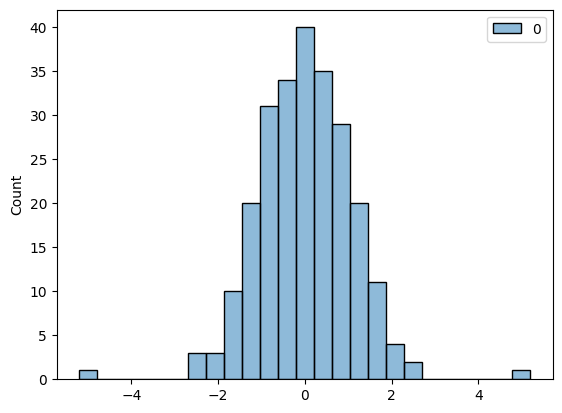

C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(


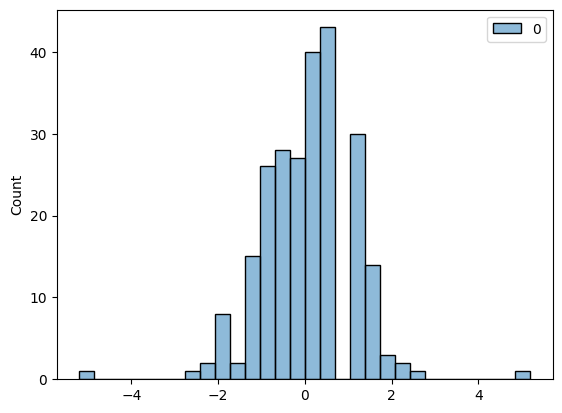

C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(


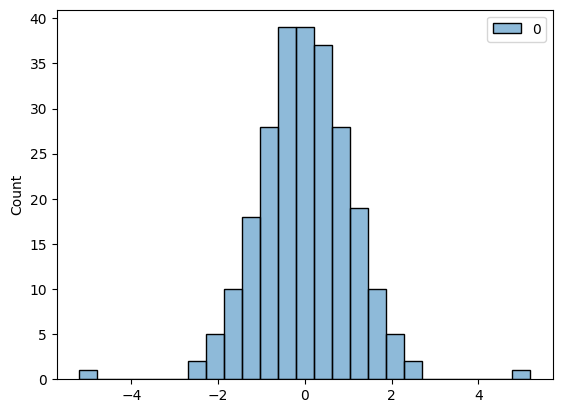

C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(


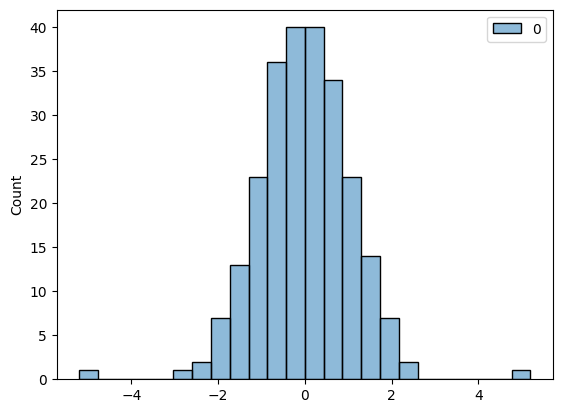

C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(


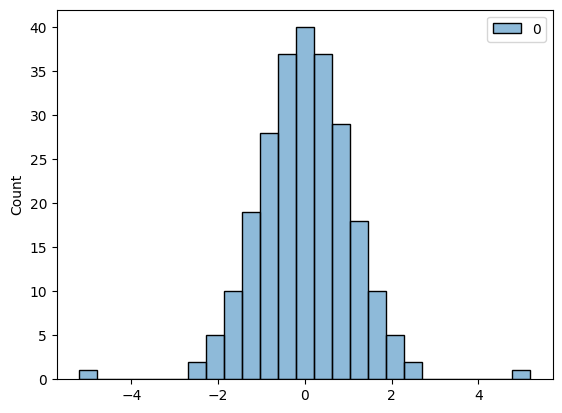

C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\Dvain\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (244). n_quantiles is set to n_samples.
  warnings.warn(


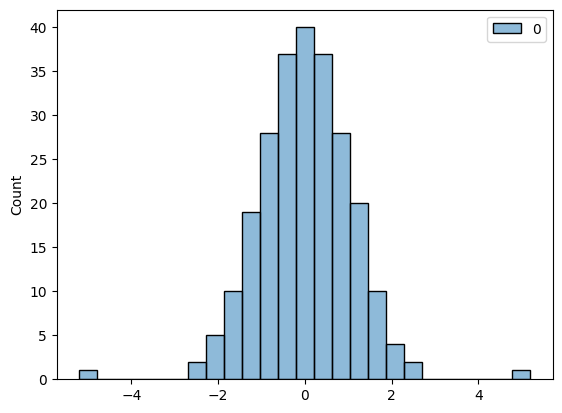

In [203]:
for col in features_p2.columns:
    try:
        sns.histplot(q_norm(features_p2[col]))
        features_p2[col]=q_norm(features_p2[col])
        plt.show()
    except Exception:
        pass

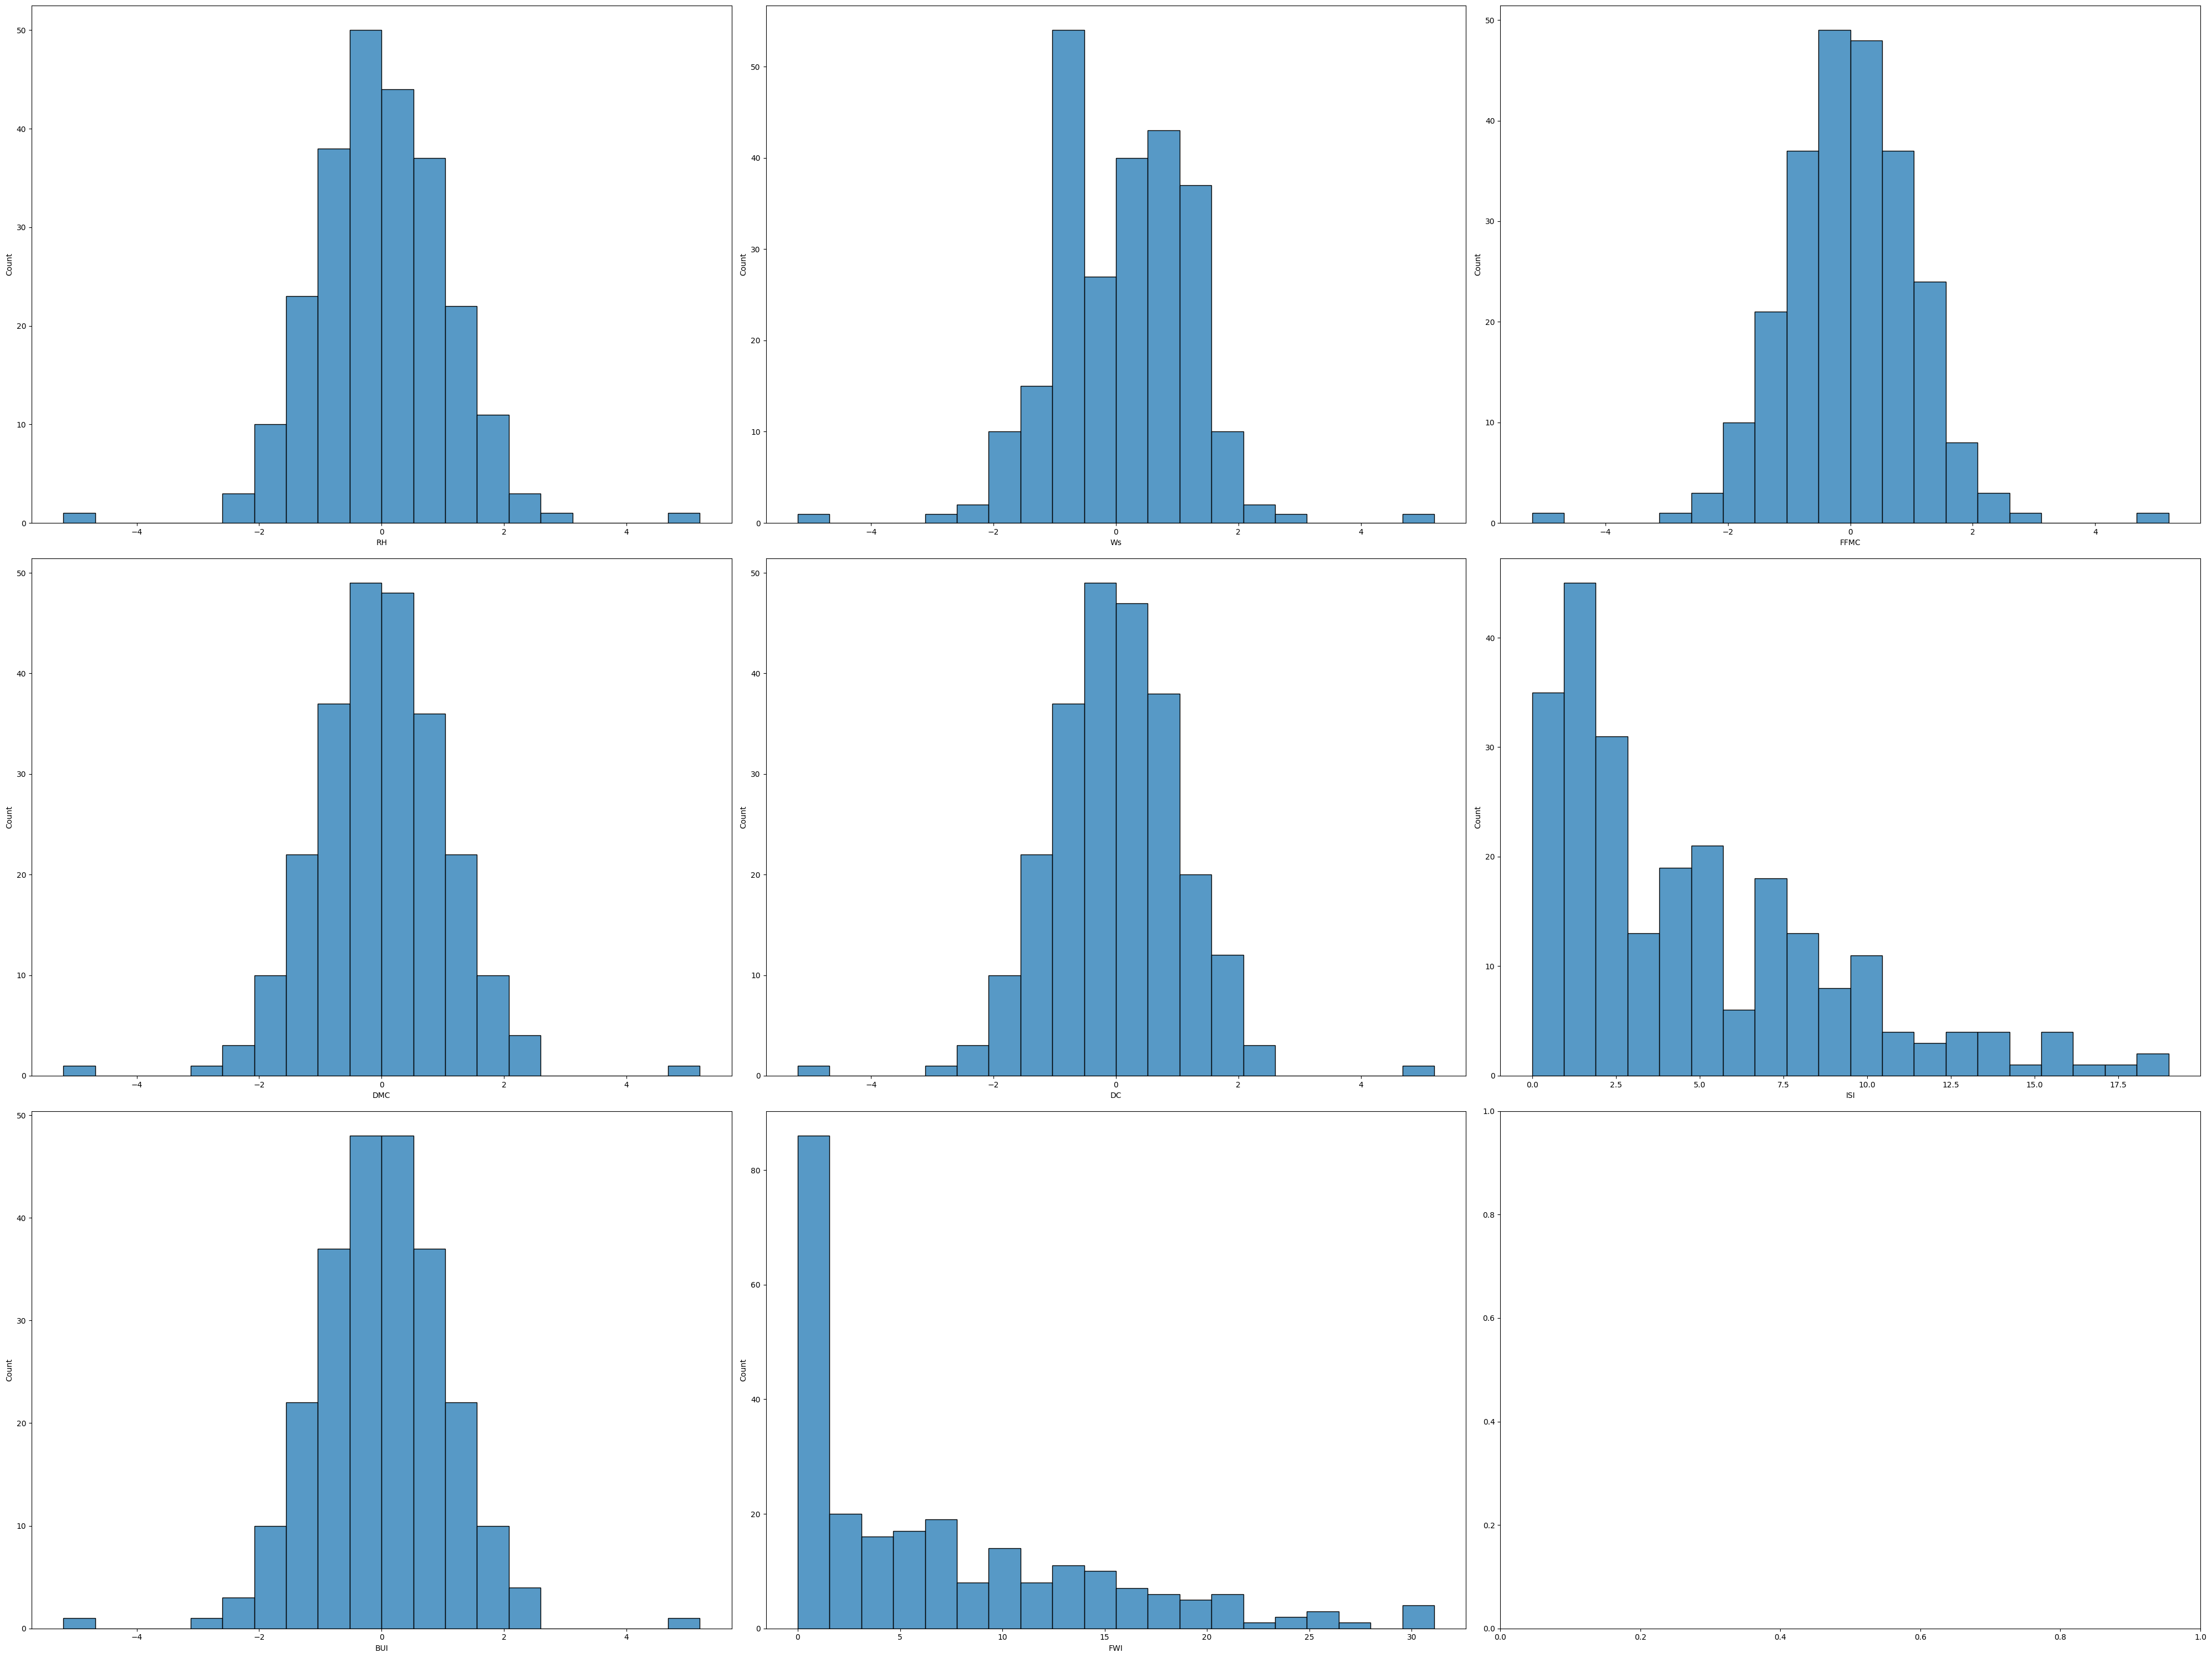

In [204]:
fig, axes=plt.subplots(3,3,figsize=(40,30))
r=c=0
for col in features_p2.columns:
    sns.histplot(features_p2[col],ax=axes[r,c],bins=20)
    if c==2:
        c=0
        r+=1
    else:
        c+=1
    plt.xlabel=col
    
plt.tight_layout()
plt.show()

Handling ISI and FWI

<Axes: ylabel='Frequency'>

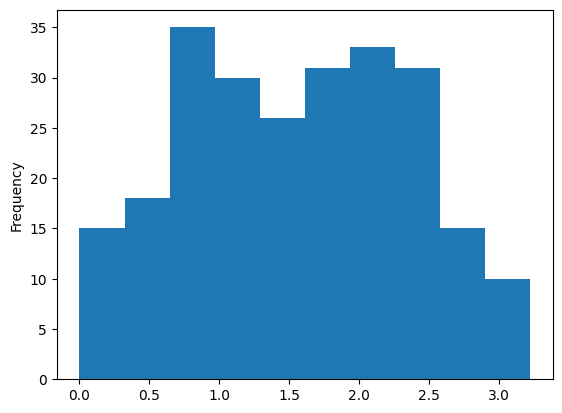

In [205]:
features_p2['ISI']=yeojohnson(features_p2['ISI'])[0]
features_p2['ISI'].plot.hist()

<Axes: ylabel='Frequency'>

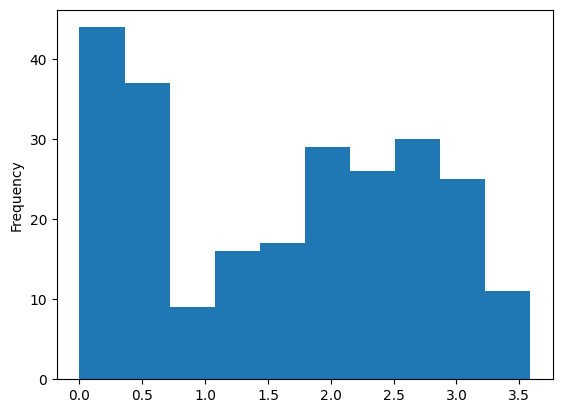

In [223]:
features_p2['FWI']=yeojohnson(features_raw['FWI'])[0]
features_p2['FWI'].plot.hist()

In [224]:
features = features_p2.columns
combinations = get_feature_combinations(features)

# Print the combinations
for comb in combinations:
    print(comb)
feat_c=combinations

('RH', 'Ws')
('RH', 'FFMC')
('RH', 'DMC')
('RH', 'DC')
('RH', 'ISI')
('RH', 'BUI')
('RH', 'FWI')
('Ws', 'FFMC')
('Ws', 'DMC')
('Ws', 'DC')
('Ws', 'ISI')
('Ws', 'BUI')
('Ws', 'FWI')
('FFMC', 'DMC')
('FFMC', 'DC')
('FFMC', 'ISI')
('FFMC', 'BUI')
('FFMC', 'FWI')
('DMC', 'DC')
('DMC', 'ISI')
('DMC', 'BUI')
('DMC', 'FWI')
('DC', 'ISI')
('DC', 'BUI')
('DC', 'FWI')
('ISI', 'BUI')
('ISI', 'FWI')
('BUI', 'FWI')
('RH', 'Ws', 'FFMC')
('RH', 'Ws', 'DMC')
('RH', 'Ws', 'DC')
('RH', 'Ws', 'ISI')
('RH', 'Ws', 'BUI')
('RH', 'Ws', 'FWI')
('RH', 'FFMC', 'DMC')
('RH', 'FFMC', 'DC')
('RH', 'FFMC', 'ISI')
('RH', 'FFMC', 'BUI')
('RH', 'FFMC', 'FWI')
('RH', 'DMC', 'DC')
('RH', 'DMC', 'ISI')
('RH', 'DMC', 'BUI')
('RH', 'DMC', 'FWI')
('RH', 'DC', 'ISI')
('RH', 'DC', 'BUI')
('RH', 'DC', 'FWI')
('RH', 'ISI', 'BUI')
('RH', 'ISI', 'FWI')
('RH', 'BUI', 'FWI')
('Ws', 'FFMC', 'DMC')
('Ws', 'FFMC', 'DC')
('Ws', 'FFMC', 'ISI')
('Ws', 'FFMC', 'BUI')
('Ws', 'FFMC', 'FWI')
('Ws', 'DMC', 'DC')
('Ws', 'DMC', 'ISI')
('Ws', 'D

In [227]:
model_ridge = [
    autoRidge(features_p2[list(i)], features_raw['Temperature']).normalize().autotune() for i in feat_c
]

In [229]:
modelr_df=pd.DataFrame(data={
    'models':model_ridge,
    'adj_r2':[i.adj_r2 for i in model_ridge],
    'mae':[i.mae for i in model_ridge],
    'mse':[i.mse for i in model_ridge],
    'rmse':[i.rmse for i in model_ridge]
    })

In [230]:
modelr_df.sort_values('adj_r2',ascending=False)


models     adj_r2       mae  \
33   <__main__.autoRidge object at 0x000001F734891A10>  57.814864  1.661689   
92   <__main__.autoRidge object at 0x000001F7349AE050>  57.124440  1.651216   
169  <__main__.autoRidge object at 0x000001F731B1A8D0>  56.876789  1.646739   
98   <__main__.autoRidge object at 0x000001F73431A2D0>  56.799347  1.661424   
90   <__main__.autoRidge object at 0x000001F73422FF10>  56.453718  1.685916   
..                                                 ...        ...       ...   
20   <__main__.autoRidge object at 0x000001F7342DA850>  37.948715  2.021781   
75   <__main__.autoRidge object at 0x000001F734318750>  37.306614  2.014708   
18   <__main__.autoRidge object at 0x000001F7340D0150>  34.688567  2.072867   
9    <__main__.autoRidge object at 0x000001F711A5B190>  31.180661  2.154889   
23   <__main__.autoRidge object at 0x000001F73717A990>  30.846193  2.121157   

          mse      rmse  
33   4.361084  2.088321  
92   4.374895  2.091625  
169  4.342268  2.083811  
98   4.408067  2.099540  
90   4.443334  2.107922  
..        ...       ...  
20   6.498148  2.549147  
75   6.481219  2.545824  
18   6.839558  2.615255  
9    7.206914  2.684570  
23   7.241940  2.691085  

[247 rows x 5 columns]

# _______________________________________________________________________________________________________________________________________________

.